# Интернет-магазине «Стримчик», кампания на 2017-й.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Данные за 2016 год могут быть неполными.


**Цель исследования**

* Выявить закономерности успеха игр в разрезе продаж.
* Ознакомится с жизненным циклом игровых платформ.
* Выделить из данных актуальный для анализа период времени.
* Провести общий исследовательский анализ данных для актуального периода времени.
* Определить наиболее перспективные жанры и платформы.
* Проанализировать влияние оценок пользователей и критиков на продажи.
* Составить портрет пользователей разных регионов.
* Оценить влияние ESRB на продажи в разных регионах.
* Проверить гипотезы заказчика в отношении оценок пользователей.
* Дать рекомендации, по наиболее перспективным категориям игр, для продажи и продвижения в магазине на 2017 год.


**Ход исследования**
1. Загрузка данных - оценить качество и характеристики данных, ознакомится с ними.
2. Переработка данных - по возможности, где целесообразно, найти и устранить аномалии в данных.
3. Исследовательский анализ данных:  
   - Определить актуальный для исследования временной интервал
   - Произвести его анализ на предмет наиболее высоких продаж
4. Портреты пользователей из разных регионов - (NA, EU, JP):
   - Оценить предпочтения пользователей к платформам и жанрам
   - Оценить влияние ESRB на продажи
5. Проверка гипотез - проверить гипотезы заказчика в отношении оценок пользователей.
6. Общий вывод - Подытожить исследование. Дать рекомендации.

**Содержание**<a id='toc0_'></a>    
1. [Загрузка данных](#toc1_)    
2. [Переработка  данных](#toc2_)    
2.1. [Проруски](#toc2_1_)    
2.2. [Дубликаты](#toc2_2_)    
2.3. [ name, genre](#toc2_3_)    
2.4. [restore_column_by_name(name_column, n)](#toc2_4_)    
2.5. [year_of_release](#toc2_5_)    
2.5.1. [Восстановление](#toc2_5_1_)    
2.6. [user_score](#toc2_6_)    
2.6.1. [Восстановление](#toc2_6_1_)    
2.7. [critic_score](#toc2_7_)    
2.7.1. [Восстановление](#toc2_7_1_)    
2.8. [ESRB](#toc2_8_)    
2.8.1. [EC, K-A](#toc2_8_1_)    
2.8.2. [RP](#toc2_8_2_)    
2.8.3. [Восстановление](#toc2_8_3_)    
2.9. [sales](#toc2_9_)    
2.10. [Итоги](#toc2_10_)    
3. [Исследовательский анализ данных](#toc3_)    
3.1. [year_of_release](#toc3_1_)    
3.2. [platform](#toc3_2_)    
3.3. [Жизненный цикл наиболее популярных консолей](#toc3_3_)    
3.4. [Акутальные данные](#toc3_4_)    
3.5. [Актуальные платформы](#toc3_5_)    
3.6. [Распределение продаж по платормам](#toc3_6_)    
3.7. [Размах продаж](#toc3_7_)    
3.8. [Влияние отзывов на продажи. PS4.](#toc3_8_)    
3.9. [Влияние отзывов на продажи. Другие платформы.](#toc3_9_)    
3.10. [Распределение игр и продаж по жанрам](#toc3_10_)    
4. [Портреты пользователей из разных регионов](#toc4_)    
4.1. [Портрет пользователя NA](#toc4_1_)    
4.2. [Портрет пользователя EU](#toc4_2_)    
4.3. [Портрет пользователя JP](#toc4_3_)    
4.4. [Топ-5 Сравнение Платформ](#toc4_4_)    
4.5. [Топ-5 Сравнение Жанров](#toc4_5_)    
5. [Проверка  гипотез](#toc5_)    
5.1. [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#toc5_1_)    
5.2. [Средние пользовательские рейтинги жанров `Action` и `Sports` разные.](#toc5_2_)    
6. [Общий вывод](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import seaborn as sns
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os

In [2]:
sns.set_context("talk")

## 1. <a id='toc1_'></a>[Загрузка данных](#toc0_)

In [3]:
path_local = 'datasets/'
path_platform = '/datasets/'
path_extra = ''

df_list = [
    'games.csv',
]

if os.path.exists(path_local) and all(list(map(os.path.exists, map(lambda x: path_local + x, df_list)))):
    df_dir = path_local
    print("Файлы найдены.")
elif os.path.exists(path_platform) and all(list(map(os.path.exists, map(lambda x: path_platform + x, df_list)))):
    df_dir = path_platform
    print("Файлы найдены.")
elif os.path.exists(path_extra) and all(list(map(os.path.exists, map(lambda x: path_extra + x, df_list)))):
    df_dir = path_extra
    print("Файлы найдены.")
elif all(list(map(os.path.exists, df_list))):
    df_dir = ''
    print("Файлы найдены.")
else:
    print("Директория не найдена. Файлы не найдены в текущей.")  

gdf = pd.read_csv(os.path.join(df_dir, 'games.csv'))

Файлы найдены.


In [4]:

gdf.columns = gdf.columns.str.lower()
print(gdf.info())
gdf.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

In [5]:
gdf.columns = gdf.columns.str.lower()
print(gdf.info())
gdf.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

Годы выпуска

In [6]:
[gdf.year_of_release.min(), gdf.year_of_release.max()]

[1980.0, 2016.0]

Платформы

In [7]:
gdf.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**Вывод**


Поправлены колонки, все названия переведены в нижний регистр. Среди значений обнаружены пропуски. Проверены годы выпуска - данные описывают очень большой, по меркам игровой индустрии, промежуток времени, значительная часть информации не является надёжным источником для оценки современного спроса. Проверены игровые платформы.  Среди них есть малозначимые платформы, данные об играх на них также не представляют интереса в рамках проекта.

## 2. <a id='toc2_'></a>[Переработка  данных](#toc0_)

Ознакомимся с документацией к данным и обработаем их.

Critic_Score — оценка критиков (максимум 100) \
Name — название игры \ 
Platform — платформа \
Year_of_Release — год выпуска \
Genre — жанр игры \
NA_sales — продажи в Северной Америке (миллионы проданных копий) \
EU_sales — продажи в Европе (миллионы проданных копий) \
JP_sales — продажи в Японии (миллионы проданных копий) \
Other_sales — продажи в других странах (миллионы проданных копий) \
Critic_Score — оценка критиков (максимум 100) \
User_Score — оценка пользователей (максимум 10) \
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### 2.1. <a id='toc2_1_'></a>[Проруски](#toc0_)

In [8]:
gdf.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Вывод** 

Обработаем каждую колонку отдельно.

### 2.2. <a id='toc2_2_'></a>[Дубликаты](#toc0_)

In [9]:
gdf.duplicated().sum()

0

Проверим регистр.

In [10]:
gdf.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [11]:
for col in ['name', 'platform', 'genre', 'rating']:
    print(gdf[col].str.lower().duplicated().sum()-gdf[col].duplicated().sum())
    

0
0
0
0


**Вывод**

Дубликатов нет. Проверено, что регистр не влияет на количество в дубликатох в столбцах с строчными данными. 

### 2.3. <a id='toc2_3_'></a>[ name, genre](#toc0_)

Проверим пропуски.

In [12]:
gdf[gdf.name.isnull()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

Это так же пропуски и колонки genre, рассмотрим их вместе.

In [13]:
gdf[(gdf.year_of_release == 1993) & (gdf.platform == 'GEN')]

name platform  \
659                                                  NaN      GEN   
7885                                    Shining Force II      GEN   
8893                             Super Street Fighter II      GEN   
11986                            Ecco: The Tides of Time      GEN   
12098  Street Fighter II': Special Champion Edition (...      GEN   
12264                                  Streets of Rage 3      GEN   
12984                                    Dynamite Headdy      GEN   
13343                                       Beyond Oasis      GEN   
14244                                                NaN      GEN   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
659             1993.0           NaN      1.78      0.53      0.00   
7885            1993.0      Strategy      0.00      0.00      0.19   
8893            1993.0      Fighting      0.00      0.00      0.15   
11986           1993.0     Adventure      0.00      0.00      0.07   
12098           1993.0        Action      0.00      0.00      0.07   
12264           1993.0        Action      0.00      0.00      0.07   
12984           1993.0      Platform      0.00      0.00      0.05   
13343           1993.0  Role-Playing      0.00      0.00      0.05   
14244           1993.0           NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
7885          0.00           NaN        NaN    NaN  
8893          0.00           NaN        NaN    NaN  
11986         0.00           NaN        NaN    NaN  
12098         0.00           NaN        NaN    NaN  
12264         0.00           NaN        NaN    NaN  
12984         0.00           NaN        NaN    NaN  
13343         0.00           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

659 это Mortal Kombat II, высокие продажи на Sega **Gen**esis. Убедимся что не создаём дубликат и заполним.

In [14]:
gdf[gdf.name == "Mortal Kombat II"]

name platform  year_of_release     genre  na_sales  eu_sales  \
892  Mortal Kombat II     SNES           1993.0  Fighting      1.48      0.39   

     jp_sales  other_sales  critic_score user_score rating  
892       0.0         0.06           NaN        NaN    NaN

In [15]:
gdf.loc[659, ['name','genre']] = ['Mortal Kombat II', 'Fighting']
gdf.loc[659]

name               Mortal Kombat II
platform                        GEN
year_of_release              1993.0
genre                      Fighting
na_sales                       1.78
eu_sales                       0.53
jp_sales                        0.0
other_sales                    0.08
critic_score                    NaN
user_score                      NaN
rating                          NaN
Name: 659, dtype: object

1422 скорее всего релиз Mortal Kombat II в японии, Посмотрим, есть ли другие подобные ситуации для консоли Sega Genesis в базе данных (БД).

In [16]:
gdf.query('platform == "GEN" and jp_sales == 0')

name platform  year_of_release     genre  \
564                Mortal Kombat      GEN           1992.0  Fighting   
659             Mortal Kombat II      GEN           1993.0  Fighting   
832                      NBA Jam      GEN           1992.0    Sports   
1453             Mortal Kombat 3      GEN           1994.0  Fighting   
1842  NBA Jam Tournament Edition      GEN           1994.0    Sports   

      na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
564       1.95      0.63       0.0         0.09           NaN        NaN   
659       1.78      0.53       0.0         0.08           NaN        NaN   
832       1.75      0.25       0.0         0.05           NaN        NaN   
1453      1.03      0.27       0.0         0.04           NaN        NaN   
1842      0.95      0.14       0.0         0.03           NaN        NaN   

     rating  
564     NaN  
659     NaN  
832     NaN  
1453    NaN  
1842    NaN

In [17]:
gdf.query('platform == "GEN" and jp_sales != 0 and na_sales == 0')

name platform  \
6451                                       Virtua Racing      GEN   
7885                                    Shining Force II      GEN   
8893                             Super Street Fighter II      GEN   
9000      Lunar 2: Eternal Blue(sales, but wrong system)      GEN   
9563                                      Gunstar Heroes      GEN   
9787                                    Ecco the Dolphin      GEN   
11563                   Yuu Yuu Hakusho: Makyo Toitsusen      GEN   
11660                Dragon Slayer: The Legend of Heroes      GEN   
11986                            Ecco: The Tides of Time      GEN   
12098  Street Fighter II': Special Champion Edition (...      GEN   
12264                                  Streets of Rage 3      GEN   
12984                                    Dynamite Headdy      GEN   
13343                                       Beyond Oasis      GEN   
14085                             J-League Pro Striker 2      GEN   
14132                             Castlevania Bloodlines      GEN   
14244                                                NaN      GEN   
14488                            Puzzle & Action: Tant-R      GEN   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
6451            1994.0        Racing       0.0       0.0      0.26   
7885            1993.0      Strategy       0.0       0.0      0.19   
8893            1993.0      Fighting       0.0       0.0      0.15   
9000            1994.0  Role-Playing       0.0       0.0      0.14   
9563            1992.0       Shooter       0.0       0.0      0.13   
9787            1992.0     Adventure       0.0       0.0      0.12   
11563           1994.0      Fighting       0.0       0.0      0.08   
11660           1994.0  Role-Playing       0.0       0.0      0.08   
11986           1993.0     Adventure       0.0       0.0      0.07   
12098           1993.0        Action       0.0       0.0      0.07   
12264           1993.0        Action       0.0       0.0      0.07   
12984           1993.0      Platform       0.0       0.0      0.05   
13343           1993.0  Role-Playing       0.0       0.0      0.05   
14085           1994.0        Sports       0.0       0.0      0.04   
14132           1994.0      Platform       0.0       0.0      0.04   
14244           1993.0           NaN       0.0       0.0      0.03   
14488           1994.0          Misc       0.0       0.0      0.03   

       other_sales  critic_score user_score rating  
6451           0.0           NaN        NaN    NaN  
7885           0.0           NaN        NaN    NaN  
8893           0.0           NaN        NaN    NaN  
9000           0.0           NaN        NaN    NaN  
9563           0.0           NaN        NaN    NaN  
9787           0.0           NaN        NaN    NaN  
11563          0.0           NaN        NaN    NaN  
11660          0.0           NaN        NaN    NaN  
11986          0.0           NaN        NaN    NaN  
12098          0.0           NaN        NaN    NaN  
12264          0.0           NaN        NaN    NaN  
12984          0.0           NaN        NaN    NaN  
13343          0.0           NaN        NaN    NaN  
14085          0.0           NaN        NaN    NaN  
14132          0.0           NaN        NaN    NaN  
14244          0.0           NaN        NaN    NaN  
14488          0.0           NaN        NaN    NaN

In [18]:
gdf[gdf.platform == 'GEN'].shape[0]

29

Предположение скорее всего ложно, большое количество игр имеют только данные по японии, вероятно какая то особенность сбора данных, например то что в японии она была известна как Mega Drive. 

Отбросим пропуск, учитывая сравнительно низкие продажи, потеря данных не значительна.

In [19]:
gdf = gdf.drop(14244).reset_index(drop=True)

In [20]:
gdf.name.isnull().sum()

0

**Вывод** 

Данныые пропуски никак не влияют на исследование. Один заменён впучную другой отброшен.

### 2.4. <a id='toc2_4_'></a>[restore_column_by_name(name_column, n)](#toc0_)

В данной таблице представлены строки где название игры одно и то же, но есть пропуск, и n значений - не пропусков в  колонке которую желаем восстановить.

Принимает результат `gdf.groupby('name').column.unique()` и число значений - не пропусков. Возвращает этот объект в котором каждому названию соответствует либо пропуск либо лист из n значений, только для тех названий где есть пропуск.

Сделана таким образом чтобы для одного значения можно было быстро восстанавливать, а для более одного действовать по ситуации.

In [21]:
def restore_column_by_name(name_col, n):
    name_col_temp = name_col.copy()
    #name_col_temp = name_col_temp.astype('str') # 
    name_col_temp[name_col_temp.map(len, na_action='ignore') != n+1] = pd.NA
    name_col_temp[name_col_temp.notna()] = name_col_temp[name_col_temp.notna()].map(
        lambda x: list(pd.Series(x).dropna()), # numpy array создаёт ряд проблем этой функции, это позволяет их обойти
        na_action='ignore')
    name_col_temp[name_col_temp.map(len, na_action='ignore') == n+1] = pd.NA
    print(name_col_temp[name_col_temp.notna()])
    return name_col_temp

### 2.5. <a id='toc2_5_'></a>[year_of_release](#toc0_)

Ознакомимся с данными, несмотря на то что это дата, она содержит только год, поэтому переведём тип данных в `Int32`. Обработаем пропуски.

In [22]:
gdf.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [23]:
gdf.year_of_release.astype('Int32')

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16709    2016
16710    2006
16711    2016
16712    2003
16713    2016
Name: year_of_release, Length: 16714, dtype: Int32

In [24]:
gdf.year_of_release = gdf.year_of_release.astype('Int32')
gdf.sample()

name platform  year_of_release  \
3390  Jikkyou Powerful Pro Yakyuu '98 Kaimakuban       PS             1998   

       genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
3390  Sports       0.0       0.0      0.55         0.04           NaN   

     user_score rating  
3390        NaN    NaN

Пропуски

In [25]:
gdf.year_of_release.isnull().sum()

269

In [26]:
gdf[gdf.year_of_release.isnull()].head(5)

name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2             <NA>    Sports      4.26   
377            FIFA Soccer 2004      PS2             <NA>    Sports      0.59   
456  LEGO Batman: The Videogame      Wii             <NA>    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2             <NA>  Fighting      1.57   
609              Space Invaders     2600             <NA>   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0        8.5      E  
377      2.36      0.04         0.51          84.0        6.4      E  
456      0.97      0.00         0.29          74.0        7.9   E10+  
475      1.02      0.00         0.41           NaN        NaN    NaN  
609      0.14      0.00         0.03           NaN        NaN    NaN

In [27]:
gdf[gdf.name == 'Madden NFL 2004']

name platform  year_of_release   genre  na_sales  eu_sales  \
183   Madden NFL 2004      PS2             <NA>  Sports      4.26      0.26   
1881  Madden NFL 2004       XB             2003  Sports      1.02      0.02   
3889  Madden NFL 2004       GC             2003  Sports      0.40      0.10   
5708  Madden NFL 2004      GBA             2003  Sports      0.22      0.08   

      jp_sales  other_sales  critic_score user_score rating  
183       0.01         0.71          94.0        8.5      E  
1881      0.00         0.05          92.0        8.3      E  
3889      0.00         0.01          94.0        7.7      E  
5708      0.00         0.01          70.0        6.6      E

#### 2.5.1. <a id='toc2_5_1_'></a>[Восстановление](#toc0_)

In [28]:
gdf[gdf.year_of_release.isna()].groupby('platform').name.count().to_frame().rename(columns={'name':'null_count'})

null_count
platform            
2600              17
3DS                8
DS                30
GB                 1
GBA               11
GC                14
N64                3
PC                17
PS                 7
PS2               34
PS3               25
PSP               16
PSV                1
Wii               34
X360              30
XB                21

In [29]:
gdf.platform.sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [30]:
gdf[gdf.year_of_release.isna()].groupby('platform').name.count().to_frame().rename(columns={'name':'null_count'})

null_count
platform            
2600              17
3DS                8
DS                30
GB                 1
GBA               11
GC                14
N64                3
PC                17
PS                 7
PS2               34
PS3               25
PSP               16
PSV                1
Wii               34
X360              30
XB                21

In [31]:
gdf.drop(
    gdf[gdf.year_of_release.isna() &
        gdf.platform.isin(['2600', 'GB', 'GBA', 'GC', 'N64', 'PS', 'PS2', 'XB'])]
    .index, inplace=True)
gdf.reset_index(drop=True, inplace=True)
gdf[gdf.year_of_release.isna()].groupby('platform').name.count().to_frame().rename(columns={'name':'null_count'})

null_count
platform            
3DS                8
DS                30
PC                17
PS3               25
PSP               16
PSV                1
Wii               34
X360              30

In [32]:
gdf.year_of_release.isna().sum()

161

In [33]:
year_min = gdf.groupby('platform').year_of_release.min() #запомним минимальные

In [34]:
year_mode = gdf.groupby('name').year_of_release.agg(lambda x: pd.Series(x).mode())
year_mode

name
 Beyblade Burst                 2016
 Fire Emblem Fates              2015
 Frozen: Olaf's Quest           2013
 Haikyu!! Cross Team Match!     2016
 Tales of Xillia 2              2012
                                ... 
thinkSMART FAMILY!              2010
thinkSMART: Chess for Kids      2011
uDraw Studio                    2010
uDraw Studio: Instant Artist    2011
¡Shin Chan Flipa en colores!    2007
Name: year_of_release, Length: 11497, dtype: object

In [35]:
year_mode[(year_mode.map(type) != np.int64)] = np.nan
year_mode = year_mode.astype('Int32')
year_mode

name
 Beyblade Burst                 2016
 Fire Emblem Fates              2015
 Frozen: Olaf's Quest           2013
 Haikyu!! Cross Team Match!     2016
 Tales of Xillia 2              2012
                                ... 
thinkSMART FAMILY!              2010
thinkSMART: Chess for Kids      2011
uDraw Studio                    2010
uDraw Studio: Instant Artist    2011
¡Shin Chan Flipa en colores!    2007
Name: year_of_release, Length: 11497, dtype: Int32

In [36]:
year_mode[gdf.name]

name
Wii Sports                       2006
Super Mario Bros.                <NA>
Mario Kart Wii                   2008
Wii Sports Resort                2009
Pokemon Red/Pokemon Blue         1996
                                 ... 
Samurai Warriors: Sanada Maru    2016
LMA Manager 2007                 2006
Haitaka no Psychedelica          2016
Spirits & Spells                 2003
Winning Post 8 2016              2016
Name: year_of_release, Length: 16606, dtype: Int32

In [37]:
gdf.year_of_release.fillna(year_mode[gdf.name].reset_index(drop=True).reindex_like(gdf.year_of_release), inplace=True)
gdf.year_of_release.isna().sum()

81

In [38]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    year_median = gdf.groupby('name').year_of_release.median().astype('Int32')
year_median

name
 Beyblade Burst                 2016
 Fire Emblem Fates              2015
 Frozen: Olaf's Quest           2013
 Haikyu!! Cross Team Match!     2016
 Tales of Xillia 2              2012
                                ... 
thinkSMART FAMILY!              2010
thinkSMART: Chess for Kids      2011
uDraw Studio                    2010
uDraw Studio: Instant Artist    2011
¡Shin Chan Flipa en colores!    2007
Name: year_of_release, Length: 11497, dtype: Int32

In [39]:
gdf.year_of_release.fillna(year_median[gdf.name].reset_index(drop=True).reindex_like(gdf.year_of_release), inplace=True)
gdf.year_of_release.isna().sum()

80

In [40]:
gdf[gdf.year_of_release < year_min[gdf.platform].reset_index(drop=True).reindex_like(gdf.year_of_release)]


name platform  year_of_release  \
5830   Harvest Moon: The Tale of Two Towns      3DS             2010   
7523     WRC: FIA World Rally Championship      PS3             2005   
15236                         Mario Tennis      3DS             2000   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
5830   Simulation      0.28      0.00      0.00         0.02           NaN   
7523       Racing      0.00      0.14      0.01         0.04          68.0   
15236      Sports      0.00      0.00      0.02         0.00           NaN   

      user_score rating  
5830         NaN    NaN  
7523         4.5    NaN  
15236        NaN    NaN

In [41]:
gdf[gdf.name == 'WRC: FIA World Rally Championship']

name platform  year_of_release   genre  \
7523   WRC: FIA World Rally Championship      PS3             2005  Racing   
9750   WRC: FIA World Rally Championship     X360             2005  Racing   
14138  WRC: FIA World Rally Championship      PSP             2005  Racing   
16073  WRC: FIA World Rally Championship       PC             2005  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
7523       0.00      0.14      0.01         0.04          68.0        4.5   
9750       0.00      0.10      0.00         0.02          66.0          6   
14138      0.02      0.01      0.00         0.00          67.0        7.8   
16073      0.00      0.01      0.00         0.00          65.0        NaN   

      rating  
7523     NaN  
9750    E10+  
14138      E  
16073     RP

In [42]:
gdf.loc[5830, 'year_of_release'] = 2011
gdf.loc[15236, 'year_of_release'] = 2014

gdf.loc[7523, 'year_of_release'] = 2014
gdf.loc[14138, 'year_of_release'] = 2010
gdf.loc[16073, 'year_of_release'] = 2010


Остальные пропуска можно заполнить медиными годами выпуска для консоли.

In [43]:

gdf.year_of_release.fillna(
    gdf.groupby('platform').year_of_release.median().astype('float32').round().astype('Int32')
    [gdf.platform].reset_index(drop=True).reindex_like(gdf.year_of_release), #reindex_like bugs out if left is duplicate indexed
    inplace = True
)
#gdf.groupby('platform').year_of_release.median().astype('float32').round().astype('Int32')[gdf.platform]

In [44]:
gdf[gdf.year_of_release < year_min[gdf.platform].reset_index(drop=True).reindex_like(gdf.year_of_release)]


Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

In [45]:
gdf.year_of_release.isna().sum()

0

In [46]:
15337

15337

**Вывод**

Тип данных изменён на `Int32`. Пропущенные данные о годе выхода игр могут обуславливаться большим количеством фактором, человеческая ошибка, сбора информации из разных источников, разные версии игры и консоли, региональные особенности, всё может приводить к сбоям получения данных. 

Удалось восстановить данные по тем случаям когда год выпуска упущен из части записей но одинаков в других с использованием методов `pandas`. Проведена проверка чтобы период выхода игр на консоли не был нарушен, вручную исправлены те случаи где произошли нарушения. Полностью отсутствующие заменены медианным года выпуска по консоли.

Ручное восстановление полностью отсутствующих данных не оправдано, но есть ли есть нужда можно восстановить их из открытых источников с помощью парсинга, но это выходит за рамки проекта.

### 2.6. <a id='toc2_6_'></a>[user_score](#toc0_)

Посмотрели уникальные, попробовали оцифровать (errors='raise'), заменили tbd = NaN, т.к. по сути это пропуски говорящие о том что на момент составления таблицы информация была еще не определена - "to be determined", или что это значение там ошибочно.

In [47]:
gdf.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [48]:
gdf.loc[gdf.user_score == 'tbd']

name platform  year_of_release       genre  \
119                     Zumba Fitness      Wii             2010      Sports   
300    Namco Museum: 50th Anniversary      PS2             2005        Misc   
517                   Zumba Fitness 2      Wii             2011      Sports   
641                      uDraw Studio      Wii             2010        Misc   
713                   Just Dance Kids      Wii             2010        Misc   
...                               ...      ...              ...         ...   
16586                 Planet Monsters      GBA             2001      Action   
16588                Bust-A-Move 3000       GC             2003      Puzzle   
16589                Mega Brain Boost       DS             2008      Puzzle   
16595                        Plushees       DS             2008  Simulation   
16597   Men in Black II: Alien Escape       GC             2003     Shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
119        3.45      2.59       0.0         0.66           NaN        tbd   
300        2.08      1.35       0.0         0.54          61.0        tbd   
517        1.51      1.03       0.0         0.27           NaN        tbd   
641        1.65      0.57       0.0         0.20          71.0        tbd   
713        1.52      0.54       0.0         0.18           NaN        tbd   
...         ...       ...       ...          ...           ...        ...   
16586      0.01      0.00       0.0         0.00          67.0        tbd   
16588      0.01      0.00       0.0         0.00          53.0        tbd   
16589      0.01      0.00       0.0         0.00          48.0        tbd   
16595      0.01      0.00       0.0         0.00           NaN        tbd   
16597      0.01      0.00       0.0         0.00           NaN        tbd   

      rating  
119        E  
300     E10+  
517        T  
641        E  
713        E  
...      ...  
16586      E  
16588      E  
16589      E  
16595      E  
16597      T  

[2408 rows x 11 columns]

In [49]:
gdf.user_score.isna().sum()

6660

In [50]:
gdf.loc[gdf.user_score == 'tbd', 'user_score'] = np.nan
gdf.user_score.isna().sum()

9068

In [51]:
gdf.user_score = pd.to_numeric(gdf.user_score , errors='raise')
gdf.critic_score = gdf.critic_score.astype('Float32')
gdf.sample(5)

name platform  year_of_release       genre  \
7286                         NHL 2K6       XB             2005      Sports   
12226  Samurai Warriors Chronicles 3      PSV             2014      Action   
12686   World Championship Athletics      Wii             2009      Sports   
4571   Jikkyou Powerful Pro Yakyuu 6      N64             1999      Sports   
13624               The Sims 2: Pets       PC             2006  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
7286       0.16      0.05      0.00         0.01          83.0         7.5   
12226      0.00      0.00      0.06         0.00          70.0         7.9   
12686      0.04      0.01      0.00         0.00          <NA>         NaN   
4571       0.00      0.00      0.39         0.03          <NA>         NaN   
13624      0.01      0.02      0.00         0.01          76.0         7.7   

      rating  
7286    E10+  
12226      T  
12686      E  
4571     NaN  
13624      T

#### 2.6.1. <a id='toc2_6_1_'></a>[Восстановление](#toc0_)

In [52]:
gdf.user_score.isna().sum()

9068

In [53]:
name_user_score = gdf.groupby('name').user_score.unique()
name_user_score

name
 Beyblade Burst                      [nan]
 Fire Emblem Fates                   [nan]
 Frozen: Olaf's Quest                [nan]
 Haikyu!! Cross Team Match!          [nan]
 Tales of Xillia 2                   [7.9]
                                   ...    
thinkSMART FAMILY!                   [nan]
thinkSMART: Chess for Kids           [nan]
uDraw Studio                         [nan]
uDraw Studio: Instant Artist    [nan, 5.7]
¡Shin Chan Flipa en colores!         [nan]
Name: user_score, Length: 11497, dtype: object

Слишком много значений чтобы обработать вручную. Воспользуемся медианой.

**Вывод**  
Тип данных изменён на `Float32` чтобы сэкономить память. Удалось устранить около 20% пропусков. `'tbd'` значения означают что оценка еще не была определена - "To Be Determined". Этот, по сути пропуск, и другие могут быть заполнены из открытых источников, но учитывая что оценка пользователей подразумевает использование современных сайтов, таких как www.metacritic.com, многие значения по играм из 1980-2000 невозможно достоверно восстановить. В то время как игры 2016 года, могут еще иметь недостаточно оценок, на гипотетический момент анализа (2016 год).

### 2.7. <a id='toc2_7_'></a>[critic_score](#toc0_)

In [54]:
gdf.critic_score.unique()

<FloatingArray>
[76.0, <NA>, 82.0, 80.0, 89.0, 58.0, 87.0, 91.0, 61.0, 97.0, 95.0, 77.0, 88.0,
 83.0, 94.0, 93.0, 85.0, 86.0, 98.0, 96.0, 90.0, 84.0, 73.0, 74.0, 78.0, 92.0,
 71.0, 72.0, 68.0, 62.0, 49.0, 67.0, 81.0, 66.0, 56.0, 79.0, 70.0, 59.0, 64.0,
 75.0, 60.0, 63.0, 69.0, 50.0, 25.0, 42.0, 44.0, 55.0, 48.0, 57.0, 29.0, 47.0,
 65.0, 54.0, 20.0, 53.0, 37.0, 38.0, 33.0, 52.0, 30.0, 32.0, 43.0, 45.0, 51.0,
 40.0, 46.0, 39.0, 34.0, 35.0, 41.0, 36.0, 28.0, 31.0, 27.0, 26.0, 19.0, 23.0,
 24.0, 21.0, 17.0, 13.0]
Length: 82, dtype: Float32

In [55]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    gdf.critic_score = gdf.critic_score.astype('Int32')
gdf.critic_score

0          76
1        <NA>
2          82
3          80
4        <NA>
         ... 
16601    <NA>
16602    <NA>
16603    <NA>
16604    <NA>
16605    <NA>
Name: critic_score, Length: 16606, dtype: Int32

#### 2.7.1. <a id='toc2_7_1_'></a>[Восстановление](#toc0_)

In [56]:
gdf.critic_score.isna().sum()

8534

In [57]:
name_critic_score = gdf.groupby('name').critic_score.unique()
name_critic_score

name
 Beyblade Burst                     [<NA>]
 Fire Emblem Fates                  [<NA>]
 Frozen: Olaf's Quest               [<NA>]
 Haikyu!! Cross Team Match!         [<NA>]
 Tales of Xillia 2                    [71]
                                   ...    
thinkSMART FAMILY!                  [<NA>]
thinkSMART: Chess for Kids          [<NA>]
uDraw Studio                          [71]
uDraw Studio: Instant Artist    [<NA>, 54]
¡Shin Chan Flipa en colores!        [<NA>]
Name: critic_score, Length: 11497, dtype: object

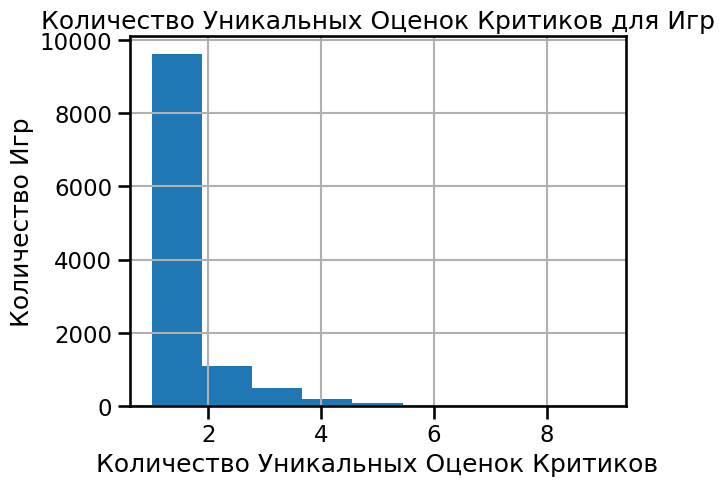

In [58]:
(
    name_critic_score.map(len).hist(bins=name_critic_score.map(len).max())
    .set(title='Количество Уникальных Оценок Критиков для Игр',
         xlabel='Количество Уникальных Оценок Критиков', ylabel='Количество Игр')
);

In [59]:
name_critic_score_l1 = restore_column_by_name(name_critic_score, 1)

name
007: The World is not Enough          [61]
Aegis of Earth: Protonovus Assault    [57]
Aliens in the Attic                   [58]
American Chopper 2: Full Throttle     [54]
American Idol                         [41]
                                      ... 
ZombiU                                [77]
Zumba Fitness                         [42]
Zumba Fitness Core                    [77]
Zumba Fitness: World Party            [73]
uDraw Studio: Instant Artist          [54]
Name: critic_score, Length: 324, dtype: object


In [60]:
name_critic_score_l1 = name_critic_score_l1.map(lambda x: x[0], na_action='ignore')
name_critic_score_l1 = name_critic_score_l1.astype('Int32')
name_critic_score_l1[name_critic_score_l1.notna()]

name
007: The World is not Enough          61
Aegis of Earth: Protonovus Assault    57
Aliens in the Attic                   58
American Chopper 2: Full Throttle     54
American Idol                         41
                                      ..
ZombiU                                77
Zumba Fitness                         42
Zumba Fitness Core                    77
Zumba Fitness: World Party            73
uDraw Studio: Instant Artist          54
Name: critic_score, Length: 324, dtype: Int32

In [61]:
critic_score_temp = name_critic_score_l1[gdf.name]
critic_score_temp = critic_score_temp.reset_index(drop=True)
critic_score_temp = critic_score_temp.astype('Int32')
critic_score_temp

0        <NA>
1        <NA>
2        <NA>
3        <NA>
4        <NA>
         ... 
16601    <NA>
16602    <NA>
16603    <NA>
16604    <NA>
16605    <NA>
Name: critic_score, Length: 16606, dtype: Int32

In [62]:
gdf.critic_score.isna().sum()

8534

In [63]:
gdf.critic_score.fillna(critic_score_temp, inplace = True)
gdf.critic_score.isna().sum()

8081

In [64]:
name_critic_score_l2 = restore_column_by_name(name_critic_score, 2)

name
50 Cent: Bulletproof                                    [47, 50]
AC/DC LIVE: Rock Band Track Pack                        [60, 63]
Alvin and the Chipmunks                                 [33, 30]
Arcana Heart 3                                          [73, 68]
Arcania: Gothic 4                                       [63, 64]
                                                          ...   
Wasteland 2                                             [81, 77]
Winter Stars                                            [46, 53]
Wolfenstein: The New Order                              [79, 81]
World Series of Poker 2008: Battle for the Bracelets    [75, 74]
You Don't Know Jack                                     [81, 82]
Name: critic_score, Length: 171, dtype: object


Слишком много значений чтобы обработать вручную. Воспользуемся медианой.

In [65]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    display(gdf.groupby('name').critic_score.agg('median')[gdf.name].reset_index(drop=True).astype('Int32'))

0          76
1        <NA>
2          82
3          80
4        <NA>
         ... 
16601    <NA>
16602    <NA>
16603    <NA>
16604    <NA>
16605    <NA>
Name: critic_score, Length: 16606, dtype: Int32

In [66]:
gdf.user_score.isna().sum()

9068

In [67]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    gdf.critic_score = gdf.critic_score.fillna(
        gdf.groupby('name').critic_score.agg('median')[gdf.name].reset_index(drop=True).astype('Int32'))
gdf.critic_score.isna().sum()

7577

**Вывод**  
Удалось устранить около 4% пропусков. Это значение заполняется из открытых источников и подлежит восстановлению с помощью парсинга. Пропуски обусловлены скорее всего либо очень старыми играми, для которых нет оценок, либо очень новыми, для которых их еще нет. Также возможны человеческие и технические сбои при сборе информации.

### 2.8. <a id='toc2_8_'></a>[ESRB](#toc0_)


In [68]:
gdf.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

#### 2.8.1. <a id='toc2_8_1_'></a>[EC, K-A](#toc0_)

K-A - "Kids to Adults", EC - "Early Childhood", устаревшие рейтинги, по сути своей не отличающиеся от E - "for Everyone". Заменим их, дабы иметь более стандартизированную информацию по рейтингу. Сохраним оригиналы на случай если они понадобятся.

In [69]:
kids_to_adults = gdf.loc[gdf.rating == "K-A", ['name', 'rating']]
kids_to_adults

name rating
652        Theme Hospital    K-A
898    PaRappa The Rapper    K-A
16572             Worms 2    K-A

In [70]:
early_childhood = gdf.loc[gdf.rating == "EC", ['name', 'rating']]
early_childhood

name rating
4267                         Nickelodeon Team Umizoomi     EC
5000          Sesame Street: Elmo's A-to-Zoo Adventure     EC
6000         Sesame Street: Cookie's Counting Carnival     EC
6710   Dora the Explorer: Journey to the Purple Planet     EC
7525           Ni Hao, Kai-lan: New Year's Celebration     EC
9882   Dora the Explorer: Journey to the Purple Planet     EC
12974        Sesame Street: Cookie's Counting Carnival     EC
13364         Sesame Street: Elmo's A-to-Zoo Adventure     EC

In [71]:
gdf.rating.where(~((gdf.rating == "EC") | (gdf.rating == "K-A")), "E", inplace = True)

In [72]:
gdf.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

#### 2.8.2. <a id='toc2_8_2_'></a>[RP](#toc0_)

RP - "Rating Pending" это значения которые поступили в обработку но ещё не получили рейтинг. Учитывая разнобой в данных могут быть случаи что в некоторых строках уже есть действительный рейтинг.

In [73]:
gdf[gdf.rating == 'RP'].name

13581                    Clockwork Empires
14174              Supreme Ruler: Cold War
16073    WRC: FIA World Rally Championship
Name: name, dtype: object

In [74]:
gdf.name.isin(gdf[gdf.rating == 'RP'].name)

0        False
1        False
2        False
3        False
4        False
         ...  
16601    False
16602    False
16603    False
16604    False
16605    False
Name: name, Length: 16606, dtype: bool

In [75]:
gdf[gdf.name.isin(gdf[gdf.rating == 'RP'].name)].sort_values('name')

name platform  year_of_release     genre  \
13581                  Clockwork Empires       PC             2010  Strategy   
14174            Supreme Ruler: Cold War       PC             2011  Strategy   
7523   WRC: FIA World Rally Championship      PS3             2014    Racing   
9750   WRC: FIA World Rally Championship     X360             2005    Racing   
14138  WRC: FIA World Rally Championship      PSP             2010    Racing   
16073  WRC: FIA World Rally Championship       PC             2010    Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
13581      0.00      0.04      0.00         0.00            58         3.8   
14174      0.00      0.03      0.00         0.01            63         6.8   
7523       0.00      0.14      0.01         0.04            68         4.5   
9750       0.00      0.10      0.00         0.02            66         6.0   
14138      0.02      0.01      0.00         0.00            67         7.8   
16073      0.00      0.01      0.00         0.00            65         NaN   

      rating  
13581     RP  
14174     RP  
7523     NaN  
9750    E10+  
14138      E  
16073     RP

Заменим первые 2 пропусками = они не несут значительной полезной информации. Для `WRC: FIA World Rally Championship` заменим `RP` и пропуск на E10+ - наиболее высокий рейтинг из 2х представленных.

In [76]:
gdf.loc[[7583, 16178], 'rating'] = 'E10+'
gdf.loc[[13671, 14268], 'rating'] = np.nan
gdf.loc[[ 13671, 14268, 7583, 16178]]

name platform  year_of_release  \
13671                     NBA in the Zone 2000      N64             2000   
14268  The Flintstones: Big Trouble in Bedrock      GBA             2001   
7583                                Shark Tale       XB             2004   
16178                             Satisfashion      Wii             2010   

          genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
13671    Sports      0.04      0.00       0.0         0.00          <NA>   
14268  Platform      0.02      0.01       0.0         0.00          <NA>   
7583     Action      0.15      0.04       0.0         0.01            67   
16178      Misc      0.01      0.00       0.0         0.00          <NA>   

       user_score rating  
13671         NaN    NaN  
14268         NaN    NaN  
7583          NaN   E10+  
16178         NaN   E10+

#### 2.8.3. <a id='toc2_8_3_'></a>[Восстановление](#toc0_)

In [77]:
gdf.rating.isna().sum()

6725

In [78]:
name_rating = gdf.groupby('name').rating.unique()
name_rating

name
 Beyblade Burst                 [nan]
 Fire Emblem Fates              [nan]
 Frozen: Olaf's Quest           [nan]
 Haikyu!! Cross Team Match!     [nan]
 Tales of Xillia 2                [T]
                                ...  
thinkSMART FAMILY!                [E]
thinkSMART: Chess for Kids        [E]
uDraw Studio                      [E]
uDraw Studio: Instant Artist      [E]
¡Shin Chan Flipa en colores!    [nan]
Name: rating, Length: 11497, dtype: object

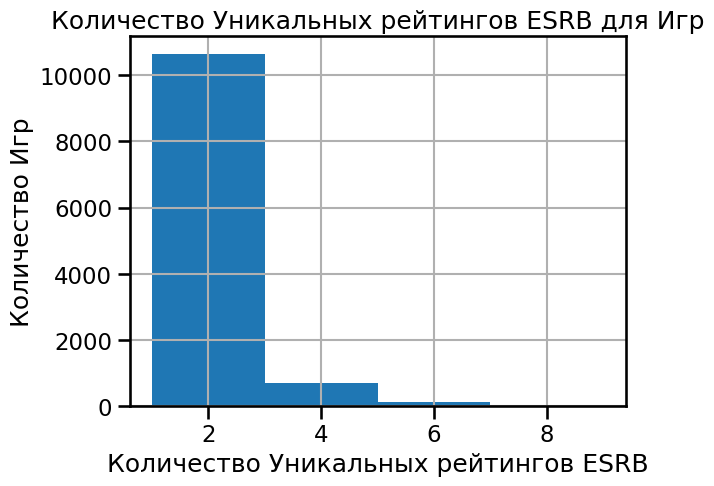

In [79]:
(
    name_user_score.map(len).hist(bins=name_rating.map(len).max())
    .set(title='Количество Уникальных рейтингов ESRB для Игр',
         xlabel='Количество Уникальных рейтингов ESRB', ylabel='Количество Игр')
);



#name_rating.map(len).hist(bins=name_rating.map(len).max()).set_title('rating - Количество Уникальных');

In [80]:
pd.Series(['E']).values

array(['E'], dtype=object)

In [81]:
name_rating_l1 = restore_column_by_name(name_rating, 1)

name
007: Quantum of Solace               [T]
007: The World is not Enough         [T]
50 Cent: Bulletproof                 [M]
50 Classic Games                     [E]
Agatha Christie's The ABC Murders    [T]
                                    ... 
Yogi Bear: The Video Game            [E]
Yoostar2                             [T]
You Don't Know Jack                  [T]
ZombiU                               [M]
pro evolution soccer 2011            [E]
Name: rating, Length: 339, dtype: object


In [82]:
name_rating_l1 = name_rating_l1.map(lambda x: x[0], na_action='ignore')
name_rating_l1[name_rating_l1.notna()]

name
007: Quantum of Solace               T
007: The World is not Enough         T
50 Cent: Bulletproof                 M
50 Classic Games                     E
Agatha Christie's The ABC Murders    T
                                    ..
Yogi Bear: The Video Game            E
Yoostar2                             T
You Don't Know Jack                  T
ZombiU                               M
pro evolution soccer 2011            E
Name: rating, Length: 339, dtype: object

In [83]:
rating_temp = name_rating_l1[gdf.name]
rating_temp = rating_temp.reset_index(drop=True)
rating_temp

0        <NA>
1        <NA>
2        <NA>
3        <NA>
4        <NA>
         ... 
16601    <NA>
16602    <NA>
16603    <NA>
16604    <NA>
16605    <NA>
Name: rating, Length: 16606, dtype: object

In [84]:
gdf.rating.isna().sum()

6725

In [85]:
gdf.rating.fillna(rating_temp, inplace = True)
gdf.rating.isna().sum()

6312

In [86]:
name_rating_l2 = restore_column_by_name(name_rating, 2)

name
Battlezone                                       [T, E10+]
Doom                                                [T, M]
Final Fantasy III                                [E10+, T]
Harry Potter and the Deathly Hallows - Part 2    [T, E10+]
Legend of Kay                                    [E, E10+]
Madagascar                                       [E10+, E]
Madagascar: Escape 2 Africa                      [E, E10+]
Monster Jam: Maximum Destruction                    [T, E]
Need for Speed Underground 2                        [E, T]
Need for Speed: Most Wanted                         [T, E]
Puss in Boots                                    [E10+, E]
Ridge Racer                                      [E, E10+]
Shrek the Third                                  [E10+, E]
The Incredible Hulk                              [T, E10+]
Tony Hawk's Pro Skater 2                            [T, E]
Tony Hawk's Pro Skater 3                            [T, E]
Name: rating, dtype: object


In [87]:
rating_mode = gdf.groupby('name').rating.agg(lambda x: list(pd.Series.mode(x)))
rating_mode

name
 Beyblade Burst                  []
 Fire Emblem Fates               []
 Frozen: Olaf's Quest            []
 Haikyu!! Cross Team Match!      []
 Tales of Xillia 2              [T]
                               ... 
thinkSMART FAMILY!              [E]
thinkSMART: Chess for Kids      [E]
uDraw Studio                    [E]
uDraw Studio: Instant Artist    [E]
¡Shin Chan Flipa en colores!     []
Name: rating, Length: 11497, dtype: object

In [88]:
rating_mode_l1 = rating_mode.copy()
rating_mode_l1[rating_mode.map(len) != 1] = np.nan
rating_mode_l1 = rating_mode_l1.map(lambda x: x[0], na_action='ignore')
rating_mode_l1

name
 Beyblade Burst                 NaN
 Fire Emblem Fates              NaN
 Frozen: Olaf's Quest           NaN
 Haikyu!! Cross Team Match!     NaN
 Tales of Xillia 2                T
                               ... 
thinkSMART FAMILY!                E
thinkSMART: Chess for Kids        E
uDraw Studio                      E
uDraw Studio: Instant Artist      E
¡Shin Chan Flipa en colores!    NaN
Name: rating, Length: 11497, dtype: object

In [89]:
rating_temp = rating_mode_l1[gdf.name]
rating_temp = rating_temp.reset_index(drop=True)
rating_temp

0          E
1        NaN
2          E
3          E
4        NaN
        ... 
16601    NaN
16602    NaN
16603    NaN
16604    NaN
16605    NaN
Name: rating, Length: 16606, dtype: object

In [90]:
gdf.rating.isna().sum()

6312

In [91]:
gdf.rating.fillna(rating_temp, inplace = True)
gdf.rating.isna().sum()

6301

Из оставшихся выберем наиболее возрастной рейтинг, он наиболее невыгоден, в большинстве случаев, и таким образом мы минимизируем риск переоценить размер аудитории.

In [92]:
name_rating_l2[name_rating_l2.notna()].map(sorted)

name
Battlezone                                       [E10+, T]
Doom                                                [M, T]
Final Fantasy III                                [E10+, T]
Harry Potter and the Deathly Hallows - Part 2    [E10+, T]
Legend of Kay                                    [E, E10+]
Madagascar                                       [E, E10+]
Madagascar: Escape 2 Africa                      [E, E10+]
Monster Jam: Maximum Destruction                    [E, T]
Need for Speed Underground 2                        [E, T]
Need for Speed: Most Wanted                         [E, T]
Puss in Boots                                    [E, E10+]
Ridge Racer                                      [E, E10+]
Shrek the Third                                  [E, E10+]
The Incredible Hulk                              [E10+, T]
Tony Hawk's Pro Skater 2                            [E, T]
Tony Hawk's Pro Skater 3                            [E, T]
Name: rating, dtype: object

In [93]:
name_rating_l2[name_rating_l2.notna()] = name_rating_l2[name_rating_l2.notna()].map(sorted).map(lambda x: x[-1])
name_rating_l2['Doom'] = 'M'

In [94]:
name_rating_l2[name_rating_l2.notna()]

name
Battlezone                                          T
Doom                                                M
Final Fantasy III                                   T
Harry Potter and the Deathly Hallows - Part 2       T
Legend of Kay                                    E10+
Madagascar                                       E10+
Madagascar: Escape 2 Africa                      E10+
Monster Jam: Maximum Destruction                    T
Need for Speed Underground 2                        T
Need for Speed: Most Wanted                         T
Puss in Boots                                    E10+
Ridge Racer                                      E10+
Shrek the Third                                  E10+
The Incredible Hulk                                 T
Tony Hawk's Pro Skater 2                            T
Tony Hawk's Pro Skater 3                            T
Name: rating, dtype: object

In [95]:
gdf.rating.isna().sum()

6301

In [96]:
rating_temp = name_rating_l2[gdf.name]
rating_temp = rating_temp.reset_index(drop=True)
gdf.rating.fillna(rating_temp, inplace = True)
gdf.rating.isna().sum()

6292

In [97]:
name_rating_l3 = restore_column_by_name(name_rating, 3)

name
WRC: FIA World Rally Championship    [E10+, E, RP]
Name: rating, dtype: object


Восстановление завершено. Добавим заглушку `"N/A"` для пропусков чтобы иметь возможность категоризовать их.

In [98]:
gdf.rating.fillna('N/A', inplace=True)

In [99]:
gdf.rating.unique()

array(['E', 'N/A', 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

**Вывод**  
Стандартизирован рейтинг для детей. Обработаны данные для игры, у которой рейтинг был в процессе назначения. Удалось устранить около 6.5% пропусков. Добавлена заглушка для оставшихся.

При восстановлении руководством выступал принцип - лучше переоценить рейтинг чем недооценить его, таким образом меньше шанс переоценить потенциальную аудиторию. Пропуски могут быть обусловлены тем что ESRB, организация которая существует с 1994 года, не проверила игры, т.к. они слишком старые или не выходили в Северной Америке. Также возможны стандартные ошибки и сбои.

### 2.9. <a id='toc2_9_'></a>[sales](#toc0_)

Требуется создать столбец с суммой продаж.

In [100]:
gdf['sales'] = gdf.na_sales + gdf.eu_sales + gdf.jp_sales + gdf.other_sales
gdf['sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16601     0.01
16602     0.01
16603     0.01
16604     0.01
16605     0.01
Name: sales, Length: 16606, dtype: float64

In [101]:
for col in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales']:
    gdf[col] = gdf[col].astype('Float32')

In [102]:
gdf.dtypes

name                object
platform            object
year_of_release      Int32
genre               object
na_sales           Float32
eu_sales           Float32
jp_sales           Float32
other_sales        Float32
critic_score         Int32
user_score         float64
rating              object
sales              Float32
dtype: object

**Вывод**

Создан  столбец позволяющий оценить общие продажи игр.

### 2.10. <a id='toc2_10_'></a>[Итоги](#toc0_)

In [103]:
pd.concat([gdf.isna().sum(), gdf.dtypes], axis=1, keys =['Пропуски', 'Типы данных'])

Пропуски Типы данных
name                    0      object
platform                0      object
year_of_release         0       Int32
genre                   0      object
na_sales                0     Float32
eu_sales                0     Float32
jp_sales                0     Float32
other_sales             0     Float32
critic_score         7577       Int32
user_score           9068     float64
rating                  0      object
sales                   0     Float32

**Вывод** 

Устранены пропуски кроме оценок, слишком много факторов чтобы заменить из таблицы, не испортив данные. Типы данных приведены к оптимальным для работы со столбцами, 32 разрядный вариант используется так как занимает меньше памяти.

In [104]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16606 entries, 0 to 16605
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16606 non-null  object 
 1   platform         16606 non-null  object 
 2   year_of_release  16606 non-null  Int32  
 3   genre            16606 non-null  object 
 4   na_sales         16606 non-null  Float32
 5   eu_sales         16606 non-null  Float32
 6   jp_sales         16606 non-null  Float32
 7   other_sales      16606 non-null  Float32
 8   critic_score     9029 non-null   Int32  
 9   user_score       7538 non-null   float64
 10  rating           16606 non-null  object 
 11  sales            16606 non-null  Float32
dtypes: Float32(5), Int32(2), float64(1), object(4)
memory usage: 1.2+ MB


## 3. <a id='toc3_'></a>[Исследовательский анализ данных](#toc0_)

### 3.1. <a id='toc3_1_'></a>[year_of_release](#toc0_)

Данные описывают большой промежуток времени. Часть информации на данный момент не актуальна. Ознакомимся с годами выпуска игр подробней.

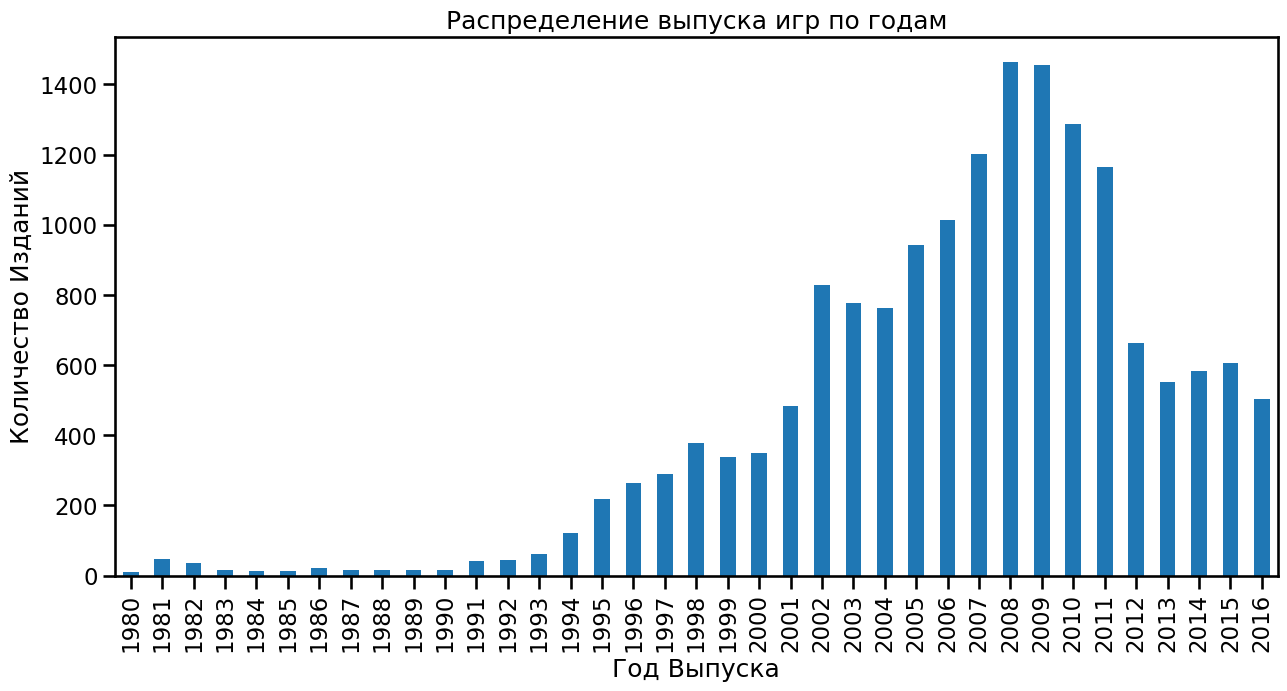

In [105]:
gdf.year_of_release.value_counts().sort_index().plot.bar(
    figsize=(15,7)).set(title='Распределение выпуска игр по годам', ylabel='Количество Изданий', xlabel='Год Выпуска');

In [106]:
gdf.shape[0]

16606

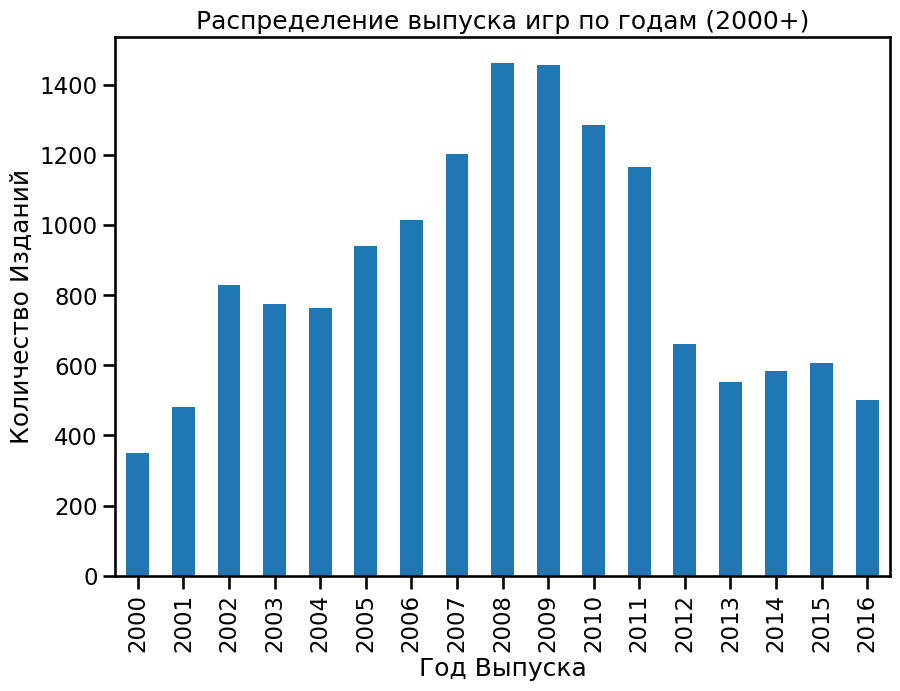

In [107]:
gdf[gdf.year_of_release >= 2000].year_of_release.value_counts().sort_index().plot.bar(
    figsize=(10,7)).set(title='Распределение выпуска игр по годам (2000+)', ylabel='Количество Изданий', xlabel='Год Выпуска');
#gdf[gdf.year_of_release >= 2000].groupby('year_of_release').year_of_release.count().plot.bar(figsize=(10,7)).set_title('Год Выпуска (2000+)')

In [108]:
gdf.query('year_of_release >= 2000').shape[0]

14631

**Вывод**  
Данные явно делятся на четыре периода по десятилетию. Данные до 2000 года определённо не актуальны, только интересны с точки зрения скачков количества записей в 1900 и в 2000 годах, обусловленных развитием и популяризацией индустрии. Мы видим уменьшение количества записей после 2010, однако, на основе одного этого графика, сложно говорить о том вызвано ли это спадом индустрии, или, например, уменьшением количества консолей, и как следствие количества записей для каждой игры.

### 3.2. <a id='toc3_2_'></a>[platform](#toc0_)

В БД присутствует большой перечень платформ включая устаревшие. Рассмотрим данные о платформах подробнее.

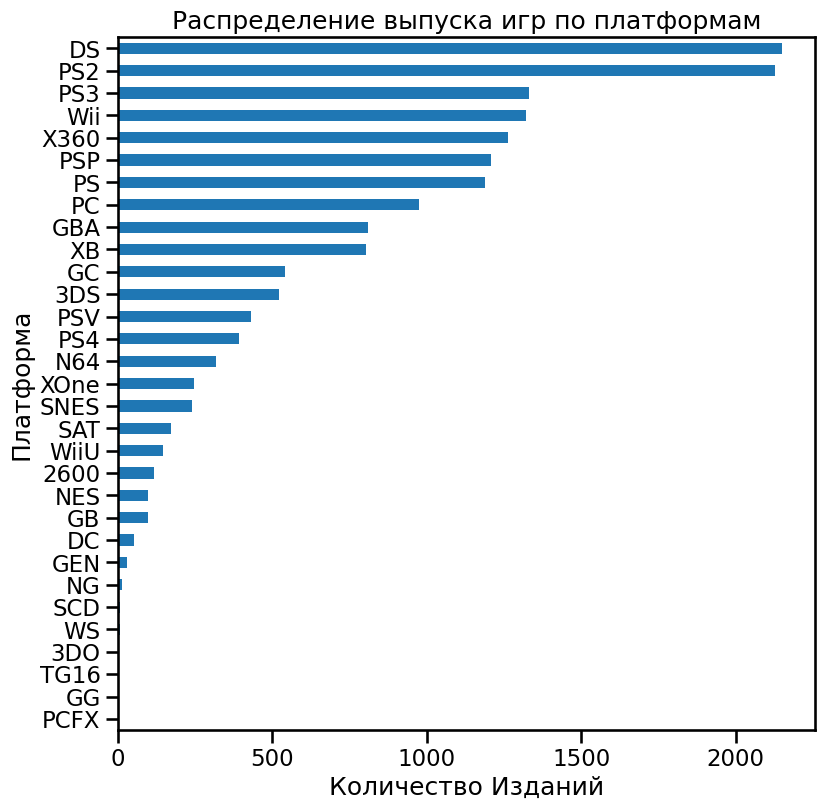

In [109]:
gdf.platform.value_counts(ascending=True).plot.barh(figsize = (9,9)).set(
    title="Распределение выпуска игр по платформам", xlabel='Количество Изданий', ylabel='Платформа');


Более половины платформ не актуальны на 2016 год. Ознакомимся ближе с 10 наиболее популярными чтобы определить какие данные стоит учитывать в дальнейшем анализе, а какие - отбросить.

In [110]:
gdf.platform.value_counts().index[:10]

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB'], dtype='object')

**DS - аномалия**

В ходе построения графика по DS выявлена аномалия, рассмотрим её перед построением графиков.

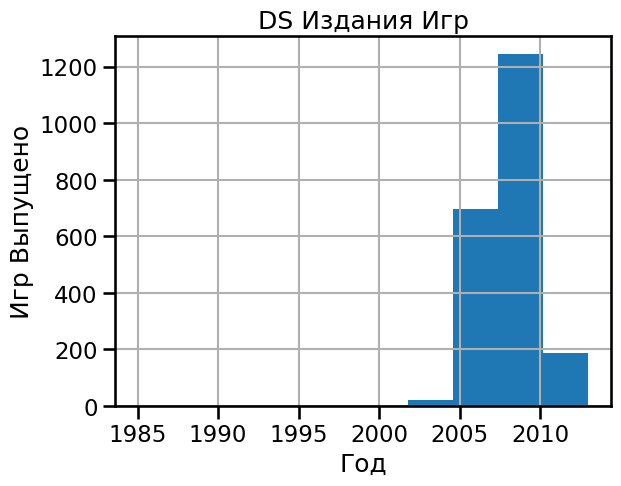

In [111]:
gdf.query('platform == "DS"').year_of_release.hist(bins=10).set(title="DS Издания Игр", ylabel='Игр Выпущено', xlabel='Год');

Скорее всего ошибочное восстановление

In [112]:
gdf.query('platform == "DS" and year_of_release < 2000')

name platform  year_of_release   genre  \
15852  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15852       0.0       0.0      0.02          0.0          <NA>         NaN   

      rating  sales  
15852    N/A   0.02

In [113]:
gdf.query('name == "Strongest Tokyo University Shogi DS"')

name platform  year_of_release   genre  \
15852  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15852       0.0       0.0      0.02          0.0          <NA>         NaN   

      rating  sales  
15852    N/A   0.02

Похоже просто ошибка, поправим вручную.

In [114]:
gdf.loc[gdf.name == "Strongest Tokyo University Shogi DS", "year_of_release"] = 2010

### 3.3. <a id='toc3_3_'></a>[Жизненный цикл наиболее популярных консолей](#toc0_)

Выберем 10 наиболее популярных платформ и ознакомимся с их жизненным циклом.

In [115]:
gdf.platform.value_counts()[:10]

DS      2151
PS2     2127
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1190
PC       974
GBA      811
XB       803
Name: platform, dtype: int64

In [116]:
gdf.platform.value_counts()[:10].index

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB'], dtype='object')

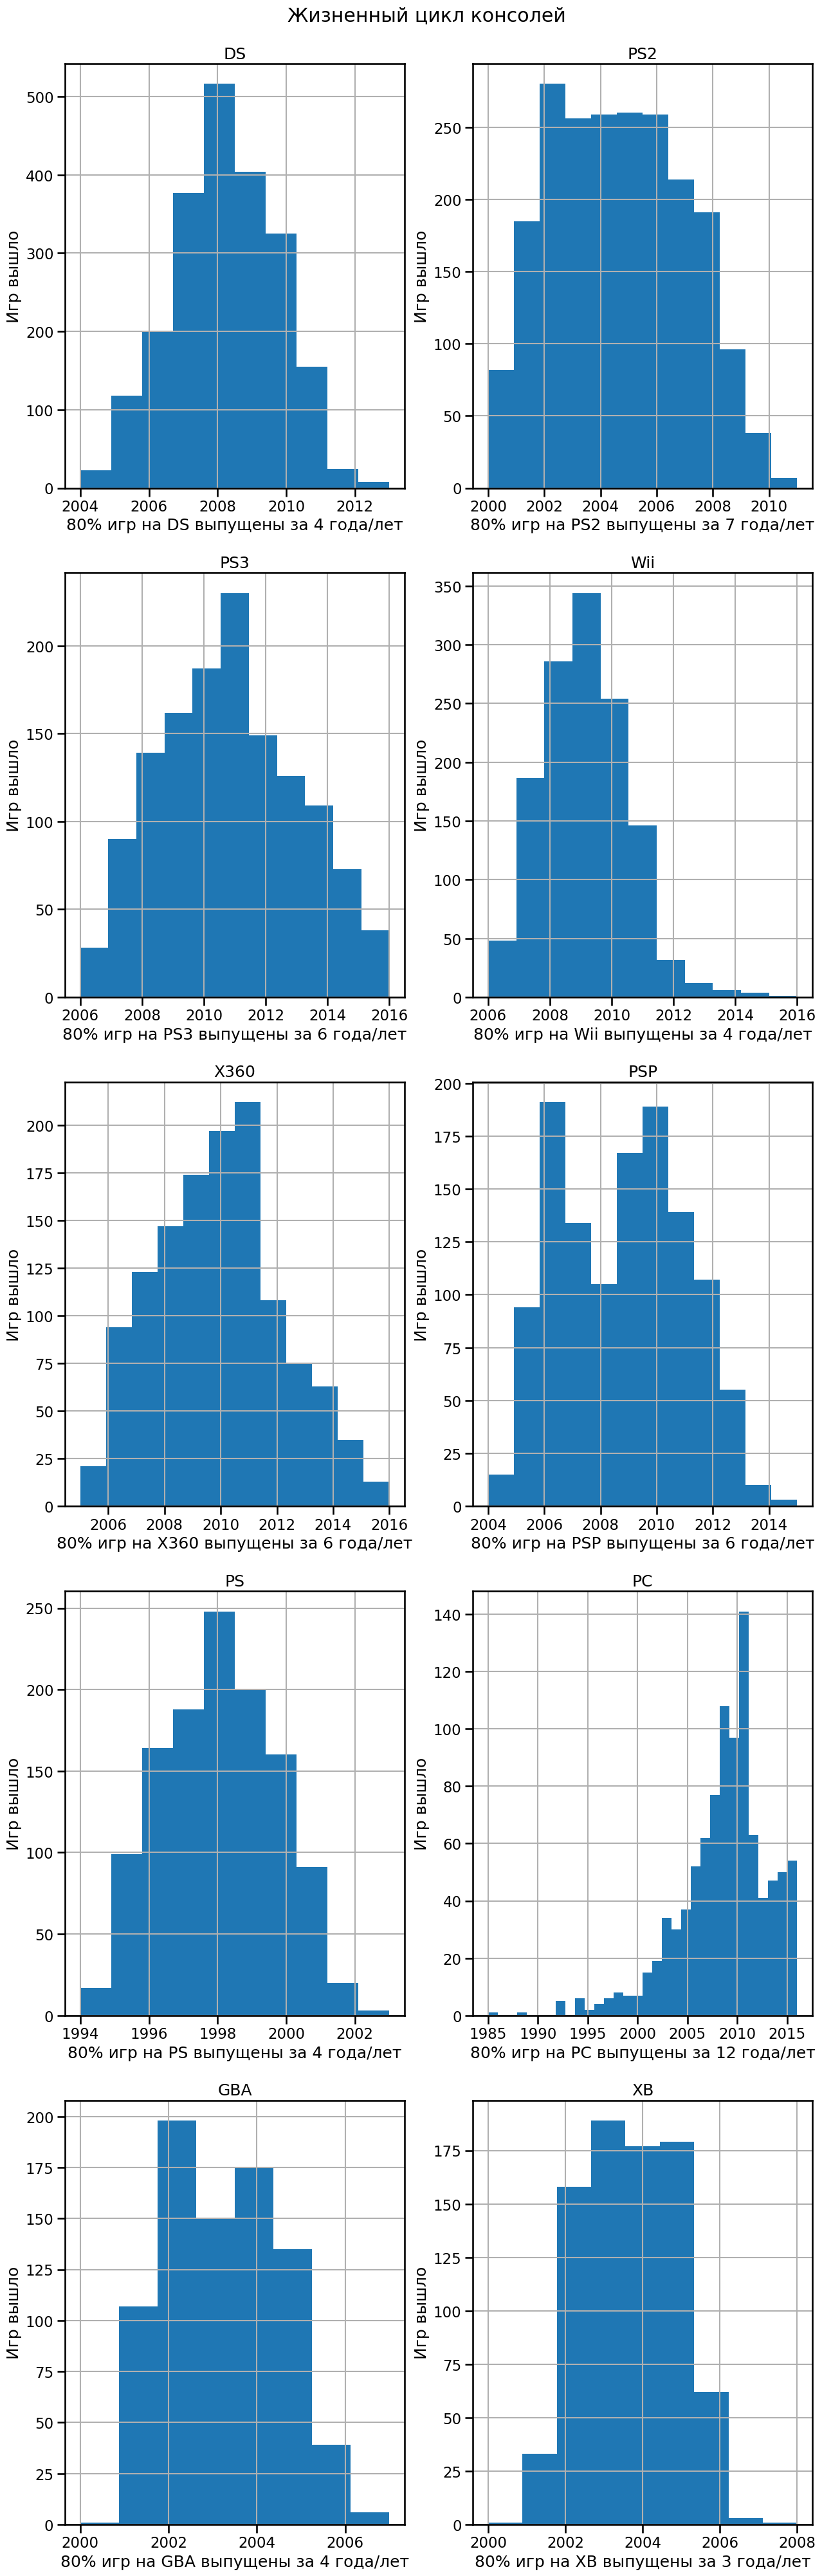

In [117]:
fig, axs = plt.subplots(5, 2, figsize=(15,45))
fig.suptitle('Жизненный цикл консолей')
fig.subplots_adjust(top=0.96)
#.set(title="DS Releases", ylabel='Games Released', xlabel='Year');
i = 0
life_cycle_top = []
life_cycle_top_full = []
for pf in ['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB']:
    years = gdf.query('platform == @pf').year_of_release
    most_games_years = round(st.iqr(years.dropna(), rng=(10,90)))
    life_cycle_top.append(most_games_years)
    life_cycle_top_full.append(years.max() - years.min() + 1)
    (
        years.hist(ax=axs[i//2, i%2], bins=years.max()-years.min()+1)
        .set(title=pf, xlabel=f'80% игр на {pf} выпущены за {most_games_years} года/лет', ylabel='Игр вышло')
    )
    i += 1

In [118]:
print(f' 80% игр на наиболее популярных игровых платформах вышли в течении : {life_cycle_top} лет')

 80% игр на наиболее популярных игровых платформах вышли в течении : [4, 7, 6, 4, 6, 6, 4, 12, 4, 3] лет


In [119]:
print(f'Полный жизненные цикл наиболее популярных игровых платформ : {life_cycle_top_full} лет')

Полный жизненные цикл наиболее популярных игровых платформ : [10, 12, 11, 11, 12, 12, 10, 32, 8, 9] лет


Среди 10ки самых популярных игровых платформ есть ПК, который в отличии от консолей не устаревает как платформа, у него жизненный цикл имеет смысл рассматривать по компонентам, но в данном случае, т.к. нас интересует в первую очередь актуальный период времени, мы можем ограничится тем чтобы отбросить значение и основываться для ПК на значениях жизненного цикла консолей.

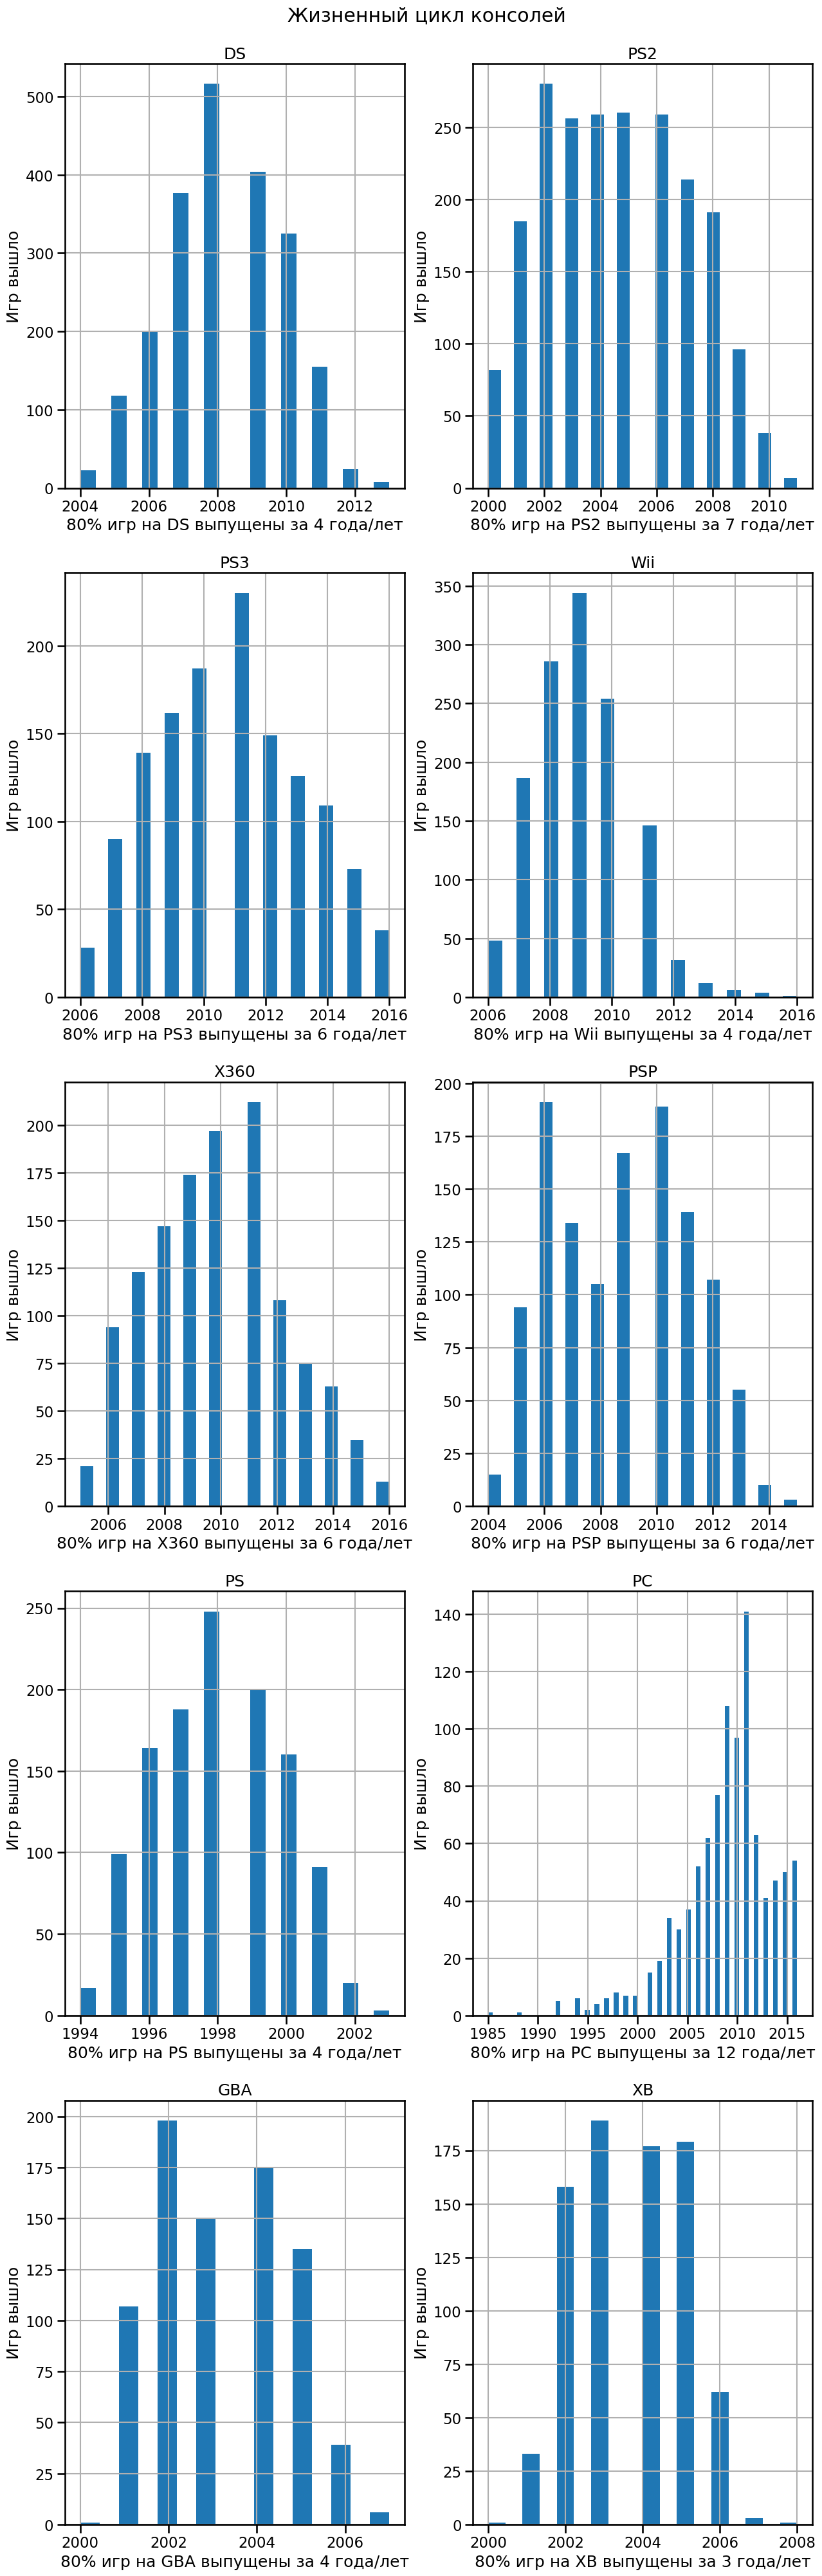

In [120]:
fig, axs = plt.subplots(5, 2, figsize=(15,45))
fig.suptitle('Жизненный цикл консолей')
fig.subplots_adjust(top=0.96)
#.set(title="DS Releases", ylabel='Games Released', xlabel='Year');
i = 0
life_cycle_top = []
life_cycle_top_full = []
for pf in ['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB']:
    years = gdf.query('platform == @pf').year_of_release
    most_games_years = round(st.iqr(years.dropna(), rng=(10,90)))
    life_cycle_top.append(most_games_years)
    life_cycle_top_full.append(years.max() - years.min() + 1)
    (
        years.hist(ax=axs[i//2, i%2], bins=(years.max()-years.min()+1)*2)
        .set(title=pf, xlabel=f'80% игр на {pf} выпущены за {most_games_years} года/лет', ylabel='Игр вышло')
    )
    i += 1

In [121]:
life_cycle_top.remove(12)
life_cycle_top_full.remove(32)

In [122]:
pd.Series(life_cycle_top).mean()

4.888888888888889

In [123]:
pd.Series(life_cycle_top_full).mean()

10.555555555555555

На основе данных консоли оказывают наибольшее влияние на рынок околоо 5 лет, полный жизненный цикл около 10 лет. Для ПК значение больше.

In [124]:
life_cycle_top_full

[10, 12, 11, 11, 12, 12, 10, 8, 9]

### 3.4. <a id='toc3_4_'></a>[Акутальные данные](#toc0_)

Учитывая что целью анализа является предсказание спроса, нас в первую очередь интересуют данные о современном рынке. Ввиду того что рынок динамичен, но полных данных по 16 году нет, возмём срез данных начиная с 2014 года включительно и ознакомимся с присутствующими тенденциями.

In [125]:
gdfa = gdf.query('year_of_release >= 2014').copy() #Games Data-Frame Actual
gdfa

name platform  year_of_release  \
31                     Call of Duty: Black Ops 3      PS4             2015   
42                            Grand Theft Auto V      PS4             2014   
47     Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                       FIFA 16      PS4             2015   
87                  Star Wars Battlefront (2015)      PS4             2015   
...                                          ...      ...              ...   
16594                           Strawberry Nauts      PSV             2016   
16598                           Aiyoku no Eustia      PSV             2014   
16601              Samurai Warriors: Sanada Maru      PS3             2016   
16603                    Haitaka no Psychedelica      PSV             2016   
16605                        Winning Post 8 2016      PSV             2016   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31          Shooter      6.03      5.86      0.36         2.38          <NA>   
42           Action      3.96      6.31      0.38         1.97            97   
47     Role-Playing      4.35      3.49       3.1         0.74          <NA>   
77           Sports      1.12      6.12      0.06         1.28            82   
87          Shooter      2.99      3.49      0.22         1.28          <NA>   
...             ...       ...       ...       ...          ...           ...   
16594     Adventure       0.0       0.0      0.01          0.0          <NA>   
16598          Misc       0.0       0.0      0.01          0.0          <NA>   
16601        Action       0.0       0.0      0.01          0.0          <NA>   
16603     Adventure       0.0       0.0      0.01          0.0          <NA>   
16605    Simulation       0.0       0.0      0.01          0.0          <NA>   

       user_score rating  sales  
31            NaN    N/A  14.63  
42            8.3      M  12.62  
47            NaN    N/A  11.68  
77            4.3      E   8.58  
87            NaN    N/A   7.98  
...           ...    ...    ...  
16594         NaN    N/A   0.01  
16598         NaN    N/A   0.01  
16601         NaN    N/A   0.01  
16603         NaN    N/A   0.01  
16605         NaN    N/A   0.01  

[1692 rows x 12 columns]

In [126]:
gdfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1692 entries, 31 to 16605
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1692 non-null   object 
 1   platform         1692 non-null   object 
 2   year_of_release  1692 non-null   Int32  
 3   genre            1692 non-null   object 
 4   na_sales         1692 non-null   Float32
 5   eu_sales         1692 non-null   Float32
 6   jp_sales         1692 non-null   Float32
 7   other_sales      1692 non-null   Float32
 8   critic_score     991 non-null    Int32  
 9   user_score       890 non-null    float64
 10  rating           1692 non-null   object 
 11  sales            1692 non-null   Float32
dtypes: Float32(5), Int32(2), float64(1), object(4)
memory usage: 137.1+ KB


### 3.5. <a id='toc3_5_'></a>[Актуальные платформы](#toc0_)

In [127]:
gdfa.platform.unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Оценим распределение игр по годам.

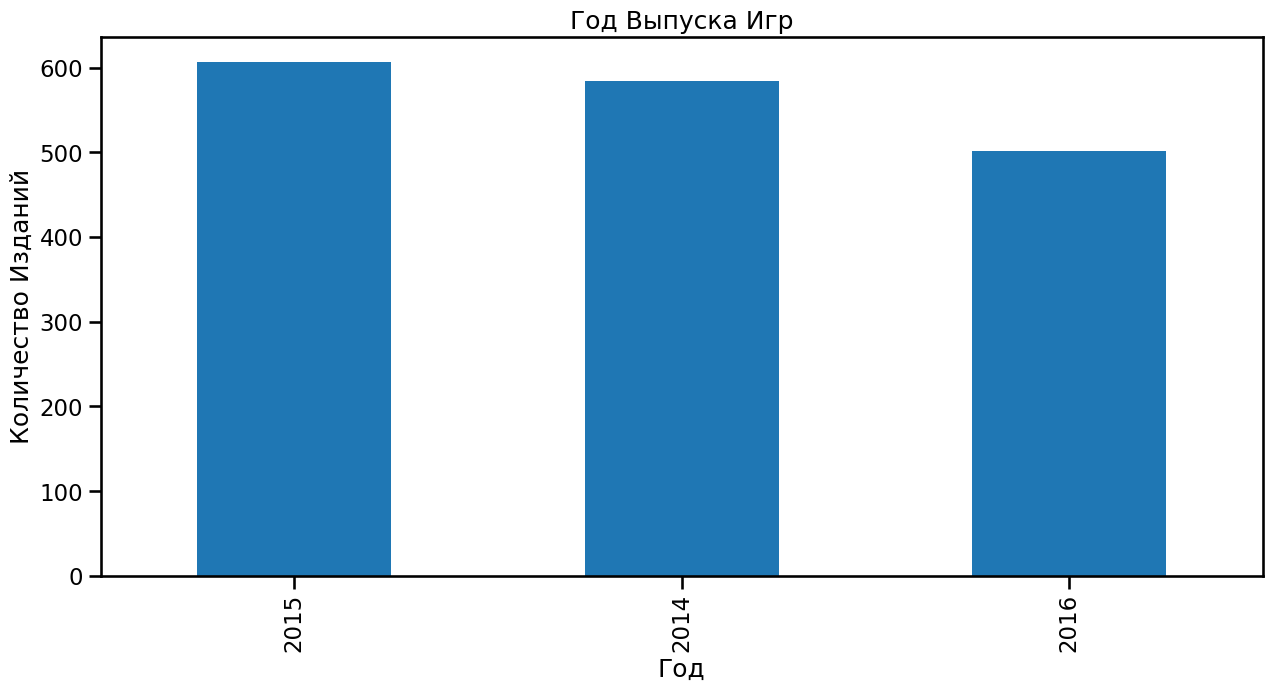

In [128]:
gdfa.year_of_release.value_counts().plot.bar(
    figsize=(15,7)).set(title='Год Выпуска Игр', ylabel='Количество Изданий', xlabel='Год');

Посмотрим как изменилось соотношение продаж игр на платформах представленных в актуальных данных по сравнению с данными по этим платформам за всё время.

In [129]:
all_time_platform_sales = gdf[gdf['platform'].isin(gdfa.platform.unique())].groupby('platform').sales.sum().sort_index()
actual_platform_sales = gdfa.groupby('platform').sales.sum().sort_index()
(
    pd.concat(
        [gdfa.platform.value_counts(),
         gdf.platform.value_counts(),
        (actual_platform_sales/actual_platform_sales.sum()*100).astype('float').round(2).sort_values(ascending=False),
        (all_time_platform_sales/all_time_platform_sales.sum()*100).astype('float').round(2)],
        #axis=1, join="inner", keys=['games actual', 'games all_time', 'sales percentage actual', 'sales percentage all_time'])
        axis=1, join="inner", keys=[('games', 'actual'), ('games', 'all_time'),
                                    ('sales percentage', 'actual'), ('sales percentage', 'all_time')])
)

games          sales percentage         
     actual all_time           actual all_time
PS4     376      392            39.48     7.41
PSV     296      430             3.10     1.27
XOne    228      247            19.23     3.76
PS3     220     1331             9.37    22.16
3DS     213      520            11.88     6.11
PC      151      974             3.71     6.12
X360    111     1262             6.61    22.91
WiiU     73      147             5.89     1.94
PSP      13     1209             0.05     6.93
Wii      11     1320             0.69    21.40

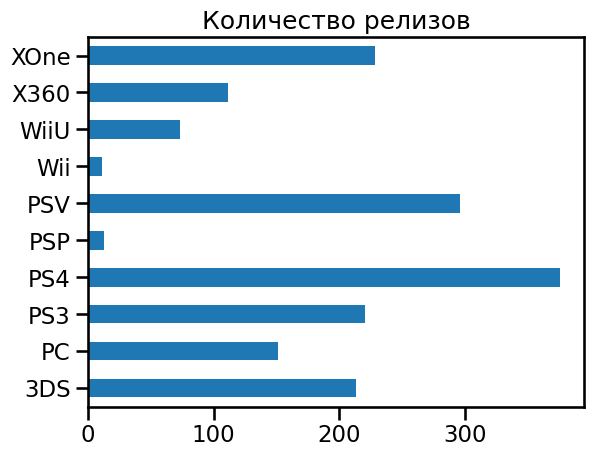

In [130]:
gdfa.platform.value_counts().sort_index().plot.barh().set(title='Количество релизов');

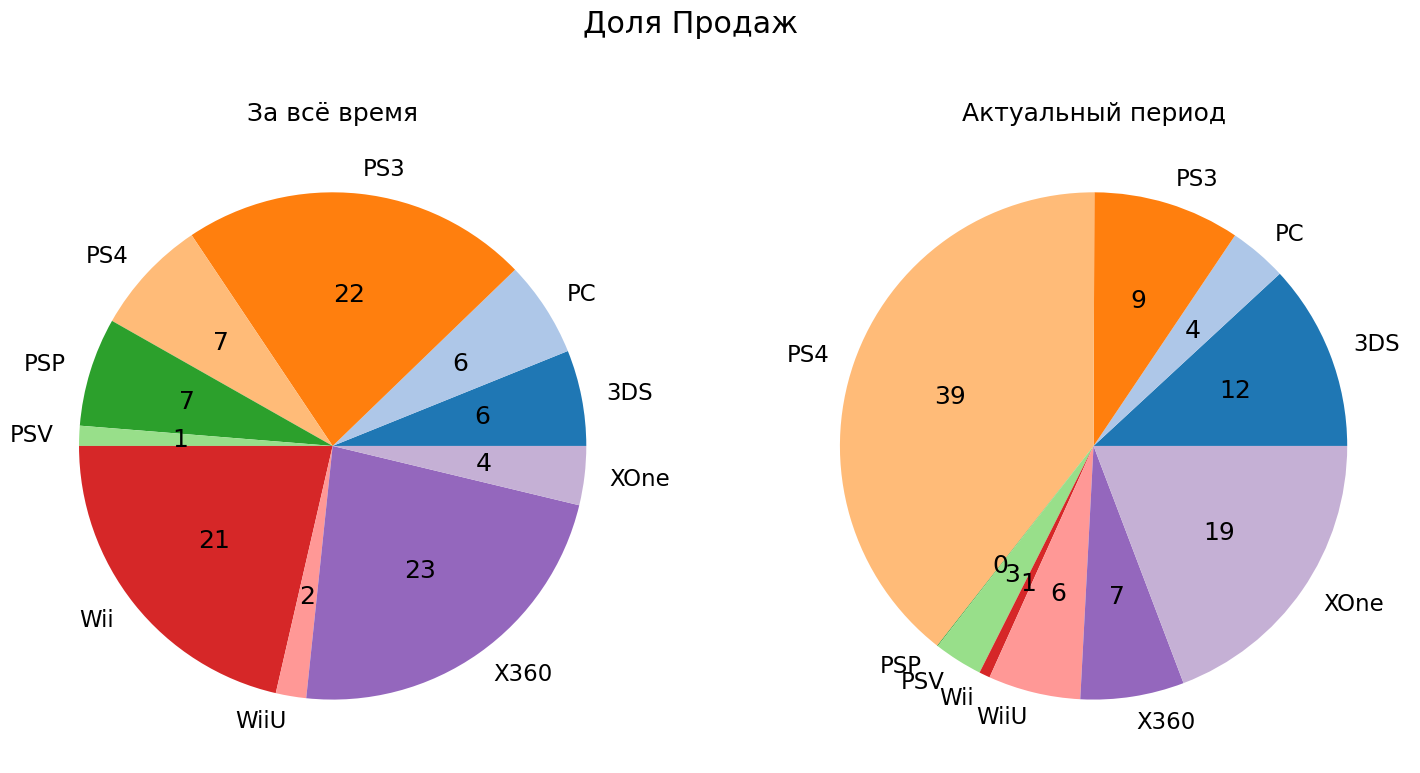

In [131]:
fig, axs = plt.subplots(1, 2, figsize=(18,9))
fig.suptitle('Доля Продаж')
all_time_platform_sales.plot.pie(autopct='%.f', ax=axs[0], title = "За всё время", colors=plt.cm.tab20.colors)
actual_platform_sales.plot.pie(autopct='%.f', ax=axs[1], title = "Актуальный период", colors=plt.cm.tab20.colors)
for axes in axs:
    axes.set(ylabel='')

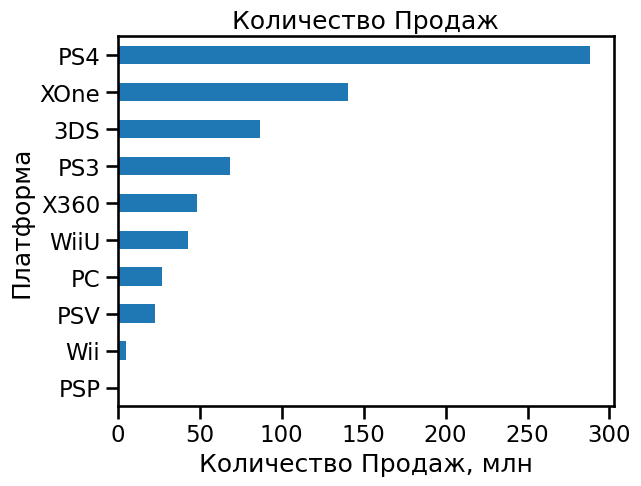

In [132]:
(
    gdfa.groupby('platform').sales.sum().sort_values().plot.barh()
    .set(title='Количество Продаж', ylabel="Платформа", xlabel="Количество Продаж, млн")
);

**Вывод**   
Мы можем увидеть, что по сравнению с данными всей БД, среди актуальных б**о**льшую роль играют консоли последнего поколения, такие как XOne,  PS4, 3DS, WiiU, PSV. Последние две сравнительно маленькие, но следуют той же тенденции. Тем не менее PS3 и X360 доминируют количеством продаж, но явно имеет тенденция на смену поколений. PC сохраняет долю рынка, но она умуньшилась.

### 3.6. <a id='toc3_6_'></a>[Распределение продаж по платормам](#toc0_)

Рассмотрим подробнее как распределены продажи для представленных в актуальных данных платформах.

In [133]:
sales_platform_year = gdfa.pivot_table(index=['platform', 'year_of_release'], values='sales', aggfunc='sum')

In [134]:
sales_platform_year.index.get_level_values(0).unique()

Index(['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'], dtype='object', name='platform')

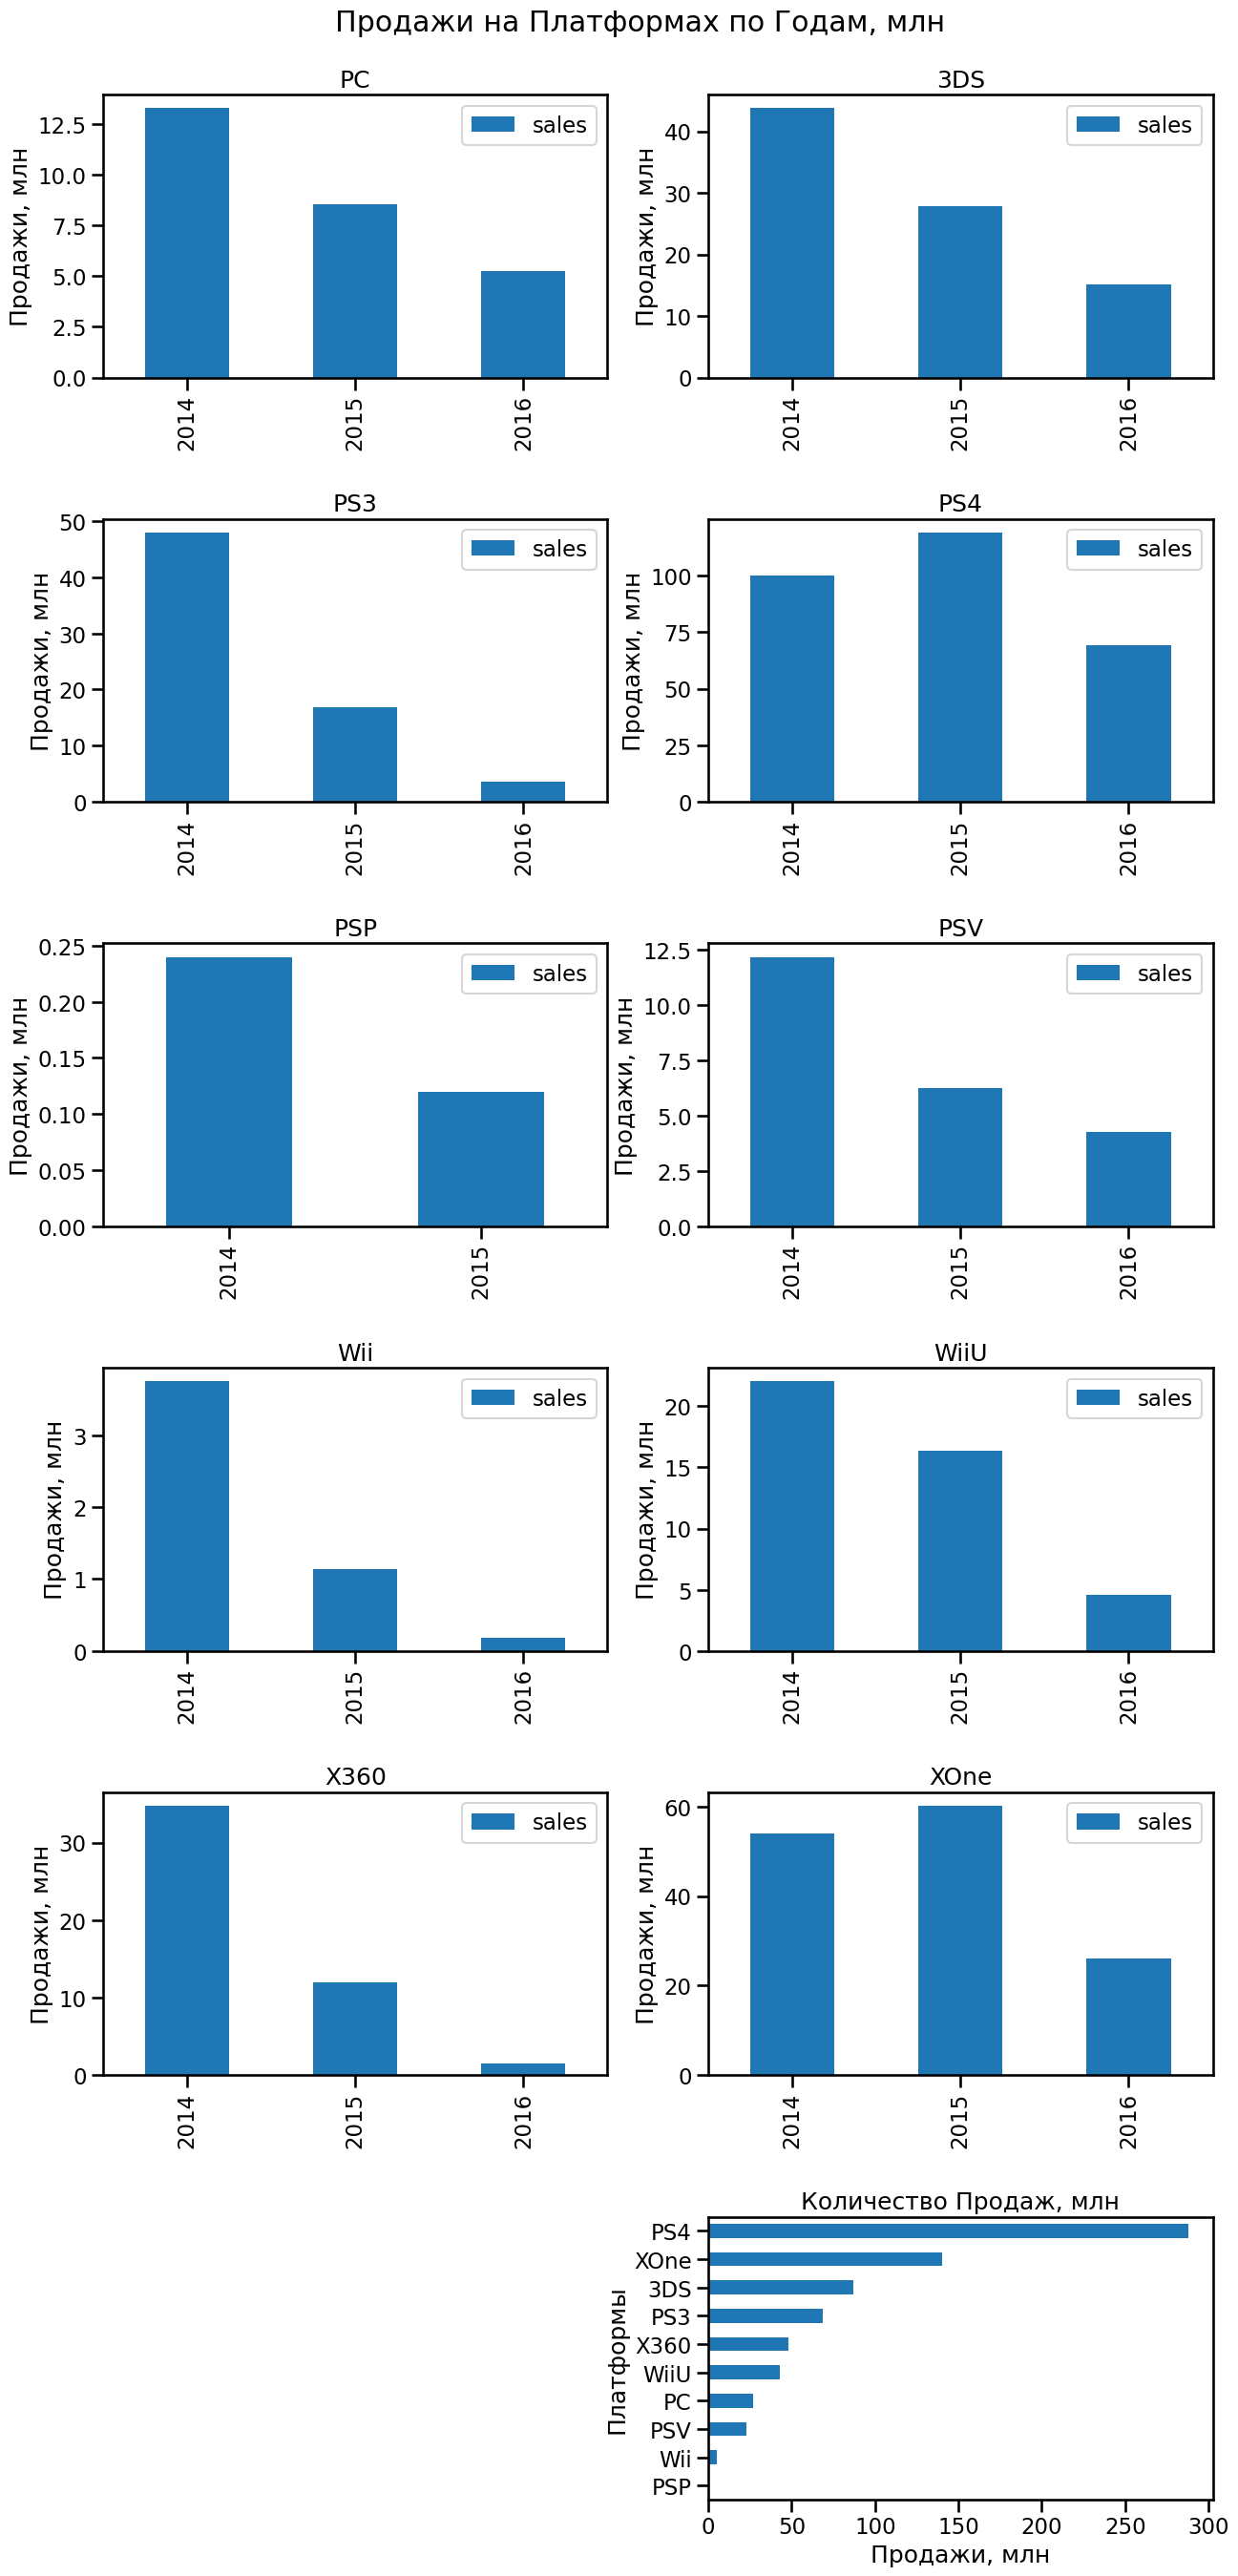

In [135]:
fig, axs = plt.subplots(6, 2, figsize=(15, 30))
fig.suptitle('Продажи на Платформах по Годам, млн')
fig.subplots_adjust(top=0.95, hspace=0.5)
#fig.tight_layout()
i = 1
for console in sales_platform_year.index.get_level_values(0).unique():
    if console == 'PC':
        posx = 0
        posy = 0
    else:
        posx = i//2
        posy = i%2
        i += 1
    sales_platform_year.loc[console].sort_index().plot.bar(ax=axs[posx, posy]).set(
        title=console, xlabel='', ylabel='Продажи, млн')    
#axs[5,1].axis('off');
gdfa.groupby('platform').sales.sum().sort_values().plot.barh(ax=axs[5,1]).set(
    title='Количество Продаж, млн', xlabel='Продажи, млн', ylabel='Платформы',);        
#, figsize=(15, 80)
axs[5, 0].axis('off');

**Вывод**  
Можно увидеть чёткое падение консолей старого поколения (левая колонка). Данные по 2016 году могут быть неполные поэтому следует ориентироваться в первую очередь на предыдущие (2014-2015). 3DS, PSV, Wii теряют популярность. У PC также падают показатели, но следует учитывать что в отличие от консолей они не пропадут с рынка. Победителями выступают PS4 и XOne, притом PS4 Практически в два раза превосходит по продажам. 

Стоит учитывать что разные платформы имеют разные бизнес модели, и прибыль от продаж может значительно отличаться.

В качестве рекоммендации можно предложить концентрировать продажи на платформах нового поколения, главным образом PS4, второстепенным приоритетом является XOne. В третью очередь стоит рассматривать платформы которые по тем или иным причинам не показывают высокие показатели но по прежнему способны принести значительную прибыль. 

Речь идёт о PS3, X360, 3DS, PC. Первые две привлекательны так как часть клиентов еще не перешло на консоли последнего поколения. 3DS имет достаточну большую долю пользователей несмотря на падение продаж, и её конкуренты сильно отстают. PC интересен так как занимает стабильную часть рынка и не устаревает, в то же время новые игры на нём значительно дороже чем на портативных консолях, даже если продажи ниже. 

В последнюю очередь имеет смысл рассматривать портативные WiiU и PSV, но только там, где они обладают высоким спросом. В остальных можно продавать игры на них, но от продвижения стоит отказаться. PSP и Wii практически не рентабельны.

### 3.7. <a id='toc3_7_'></a>[Размах продаж](#toc0_)

Построим диаграммы размаха продаж по платформам, отбросим не интересующие на PSP и Wii.

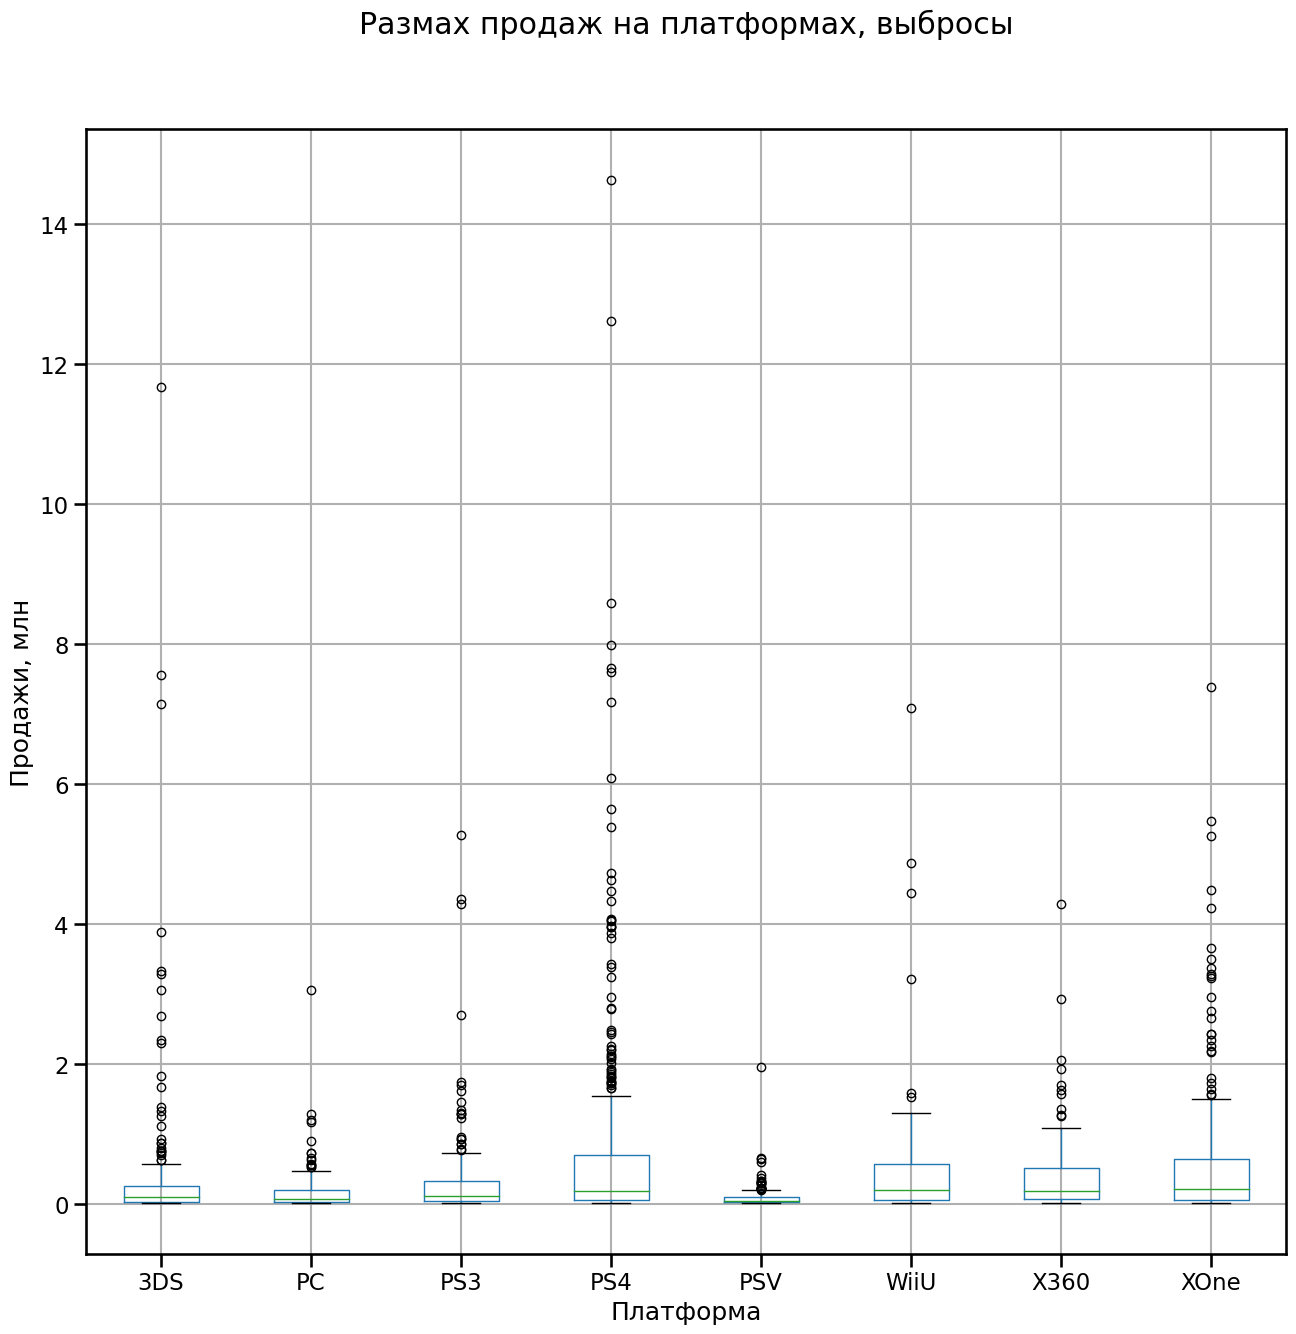

In [136]:
(
    gdfa.drop(gdfa.query('(platform == "PSP") or (platform == "Wii")').index)
    .boxplot('sales', by='platform', figsize=(15,15))
    .set(title="", ylabel='Продажи, млн', xlabel='Платформа')
)
plt.suptitle('Размах продаж на платформах, выбросы');

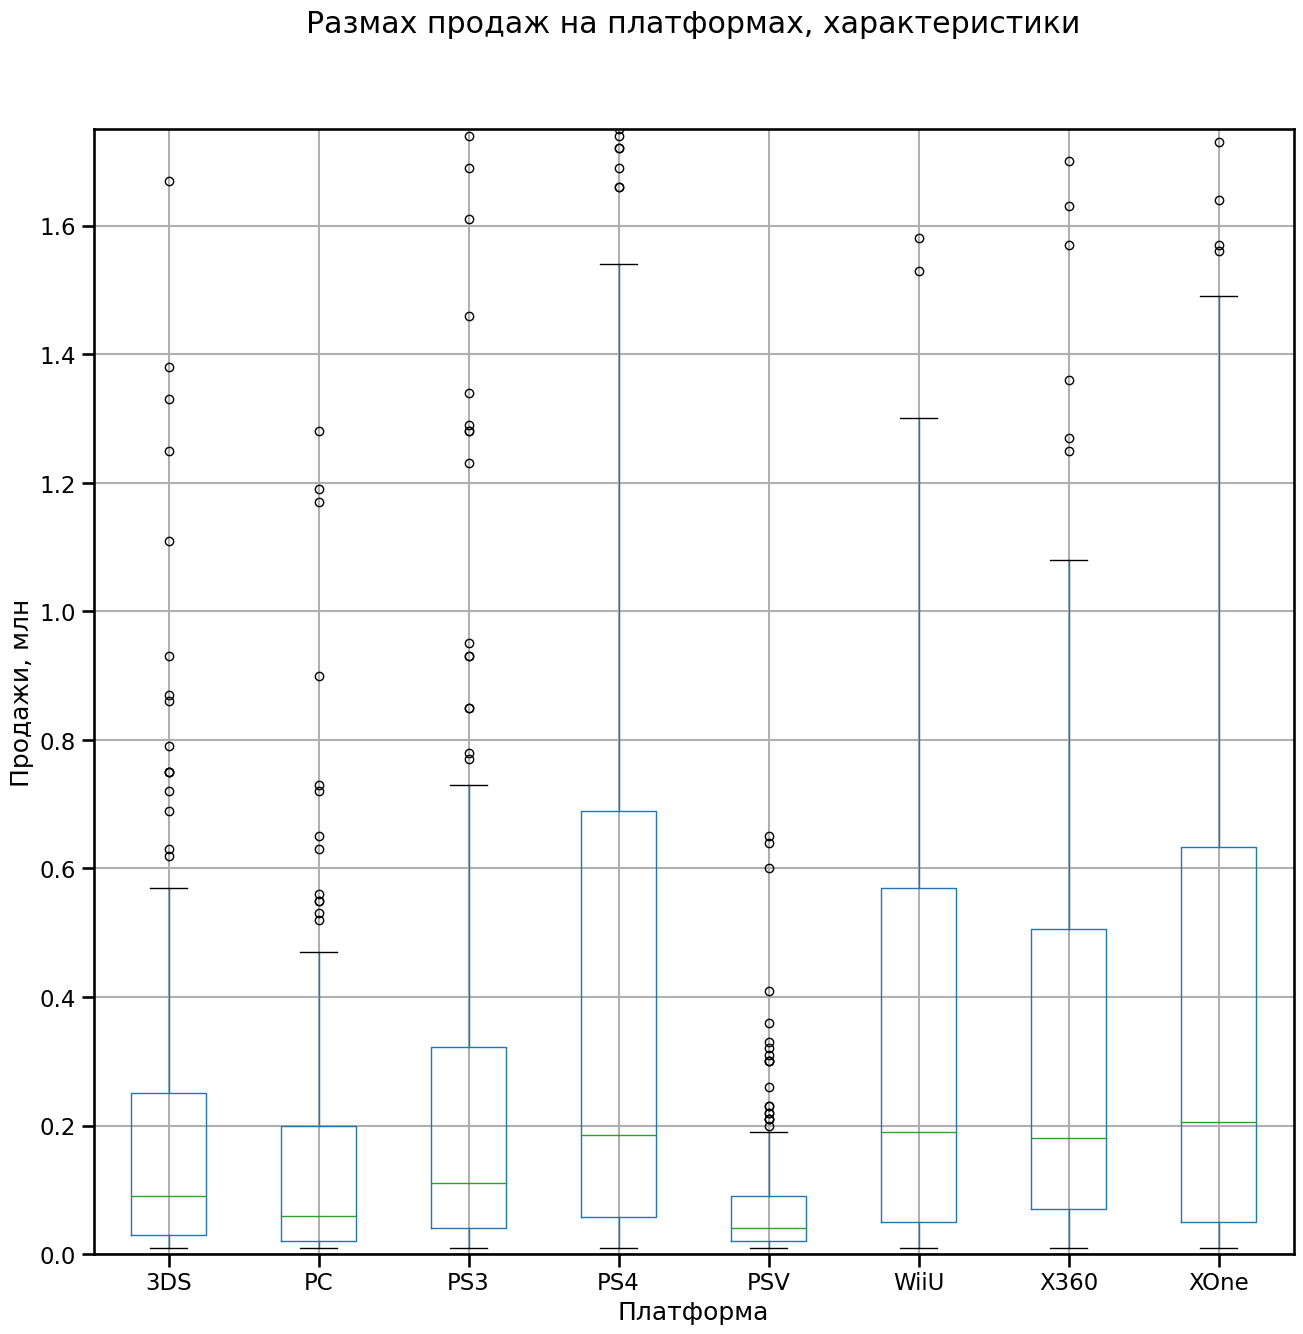

In [137]:
(
    gdfa.drop(gdfa.query('(platform == "PSP") or (platform == "Wii")').index)
    .boxplot('sales', by='platform', figsize=(15,15))
    .set(ylim=(0,1.75), xlabel='Платформа', title="", ylabel='Продажи, млн')
)
plt.suptitle('Размах продаж на платформах, характеристики');

**Вывод**  
Диаграммы размаха по платформам показывают, что, в той или иной степени, для всех консолей большинство игр имеют низкие продажи, а хиты - игры которые обретают широкую популярность, показывают значения которые во много раз могут превосходить медиану. 

Говоря о хитах, можно заметить что PS4 тут тоже является безусловным лидером, следом идут XOne и 3DS, замыкают соревнование PS3, X360 и WiiU. 

Рассматривая характеристики, примичательно что PS4 и XOne, платформы лидеры, имеют очень похожие значения медианы и квартилей, это говорит о том что игры-середнячки на них показывают похожие результаты. Также можно заметить что WiiU не сильно от них отличается, но низкое количество игр в целом, и хитов в частности не позволяет ей соревноваться с ними на равных.


### 3.8. <a id='toc3_8_'></a>[Влияние отзывов на продажи. PS4.](#toc0_)

In [138]:
gdfa

name platform  year_of_release  \
31                     Call of Duty: Black Ops 3      PS4             2015   
42                            Grand Theft Auto V      PS4             2014   
47     Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                       FIFA 16      PS4             2015   
87                  Star Wars Battlefront (2015)      PS4             2015   
...                                          ...      ...              ...   
16594                           Strawberry Nauts      PSV             2016   
16598                           Aiyoku no Eustia      PSV             2014   
16601              Samurai Warriors: Sanada Maru      PS3             2016   
16603                    Haitaka no Psychedelica      PSV             2016   
16605                        Winning Post 8 2016      PSV             2016   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31          Shooter      6.03      5.86      0.36         2.38          <NA>   
42           Action      3.96      6.31      0.38         1.97            97   
47     Role-Playing      4.35      3.49       3.1         0.74          <NA>   
77           Sports      1.12      6.12      0.06         1.28            82   
87          Shooter      2.99      3.49      0.22         1.28          <NA>   
...             ...       ...       ...       ...          ...           ...   
16594     Adventure       0.0       0.0      0.01          0.0          <NA>   
16598          Misc       0.0       0.0      0.01          0.0          <NA>   
16601        Action       0.0       0.0      0.01          0.0          <NA>   
16603     Adventure       0.0       0.0      0.01          0.0          <NA>   
16605    Simulation       0.0       0.0      0.01          0.0          <NA>   

       user_score rating  sales  
31            NaN    N/A  14.63  
42            8.3      M  12.62  
47            NaN    N/A  11.68  
77            4.3      E   8.58  
87            NaN    N/A   7.98  
...           ...    ...    ...  
16594         NaN    N/A   0.01  
16598         NaN    N/A   0.01  
16601         NaN    N/A   0.01  
16603         NaN    N/A   0.01  
16605         NaN    N/A   0.01  

[1692 rows x 12 columns]

Рассмотрим влияние отзывов на продажи на основе актуальных данных по наиболее перспективной платформе - PS4.

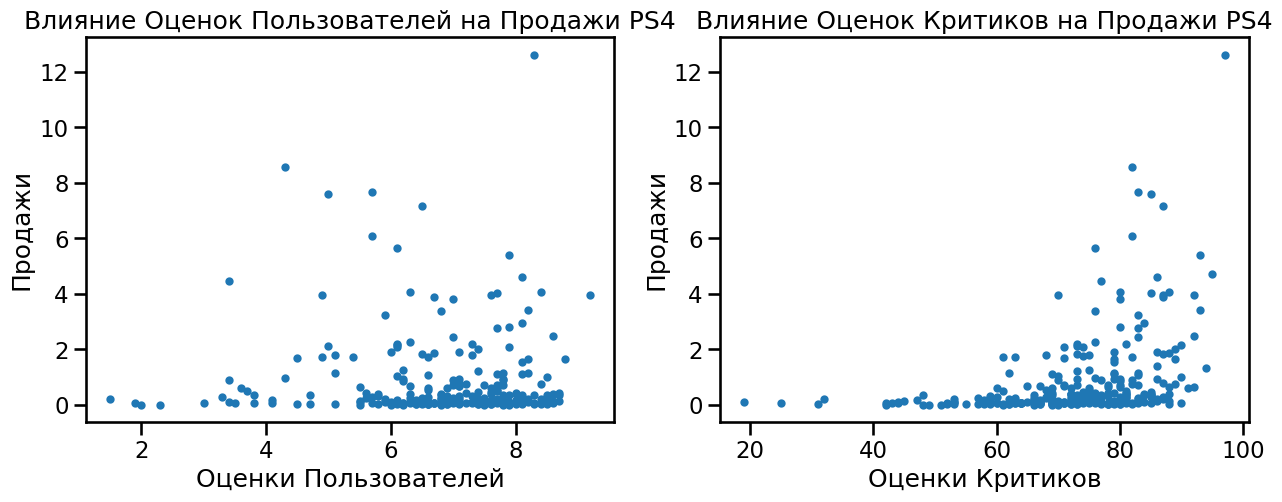

In [139]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
gdfa.query('platform == "PS4"').plot.scatter(
    x='user_score', y='sales', ax=axs[0],
    xlabel='Оценки Пользователей', ylabel='Продажи', title='Влияние Оценок Пользователей на Продажи PS4')
gdfa.query('platform == "PS4"').plot.scatter(
    x='critic_score', y='sales', ax=axs[1],
    xlabel='Оценки Критиков', ylabel='Продажи', title='Влияние Оценок Критиков на Продажи PS4');

In [140]:
print('Корреляция продаж')
gdfa.query('platform == "PS4"')[['sales', 'user_score', 'critic_score']].corr().loc['sales', ['user_score', 'critic_score']]

Корреляция продаж


user_score     -0.040132
critic_score    0.388454
Name: sales, dtype: float64

**Вывод**
Можно говорить о том что оценка критиков оказывает значительное, но не высокое, влияние на продажи, в то время как оценка пользователей практически не влияет.

### 3.9. <a id='toc3_9_'></a>[Влияние отзывов на продажи. Другие платформы.](#toc0_)

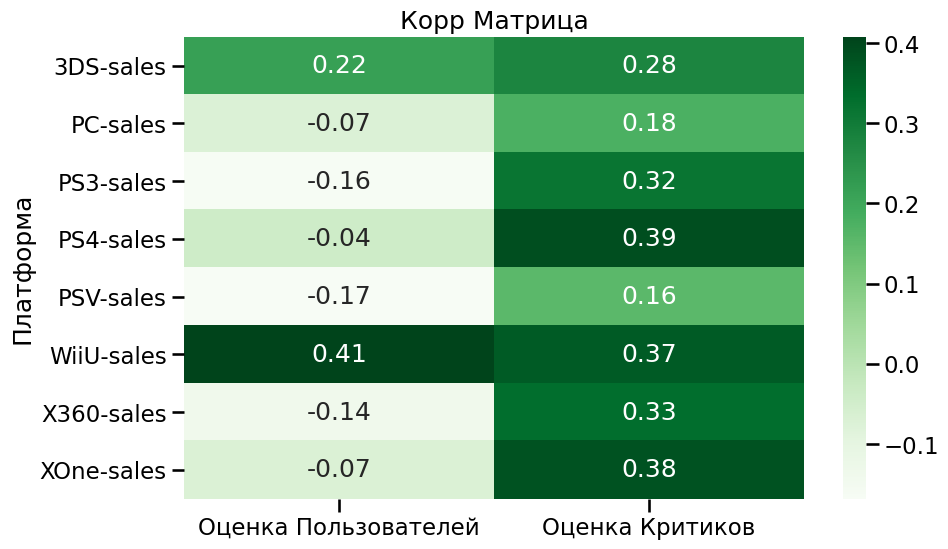

In [141]:
fig1, ax1 = plt.subplots(figsize=(10,6))
platform_sales_score_corr = gdfa.drop(gdfa.query('(platform == "PSP") or (platform == "Wii")').index)\
    .groupby('platform')[['sales', 'user_score', 'critic_score']].corr() \
    .drop(columns='sales').drop(index=['user_score', 'critic_score'], level=1)
sns.heatmap(platform_sales_score_corr, annot=True, cmap='Greens', ax=ax1, fmt='.2f') \
    .set(title='Корр Матрица', ylabel='Платформа', xticklabels=['Оценка Пользователей', 'Оценка Критиков']);

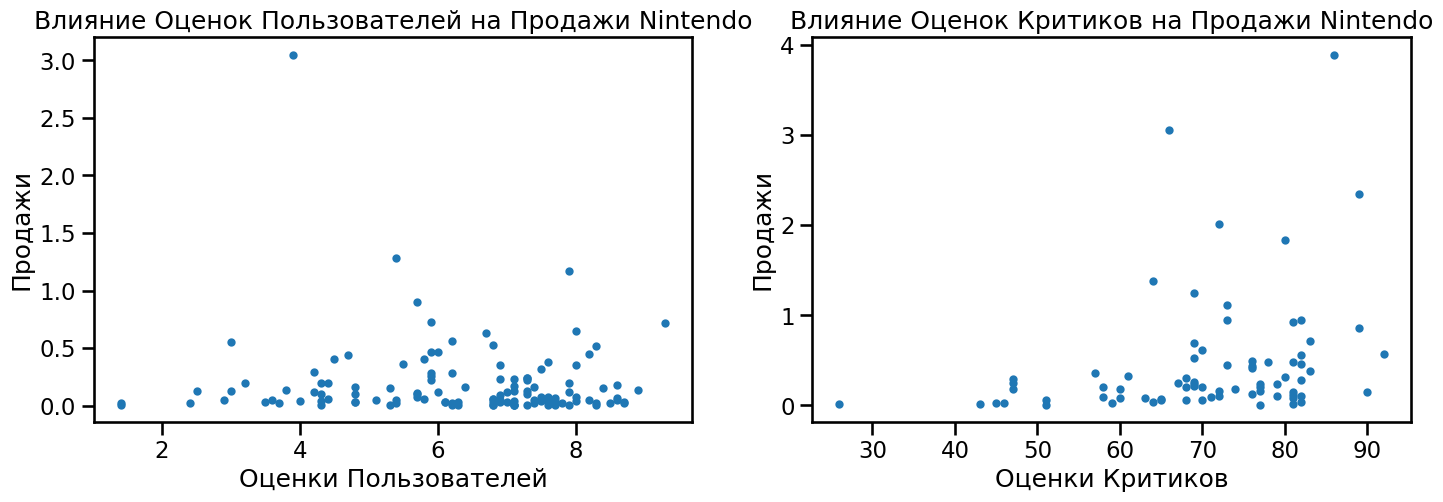

In [142]:
fig, axs = plt.subplots(1, 2, figsize=(17,5))
gdfa.query('platform == "PC"').plot.scatter(
    x='user_score', y='sales', ax=axs[0],
    xlabel='Оценки Пользователей', ylabel='Продажи', title='Влияние Оценок Пользователей на Продажи Nintendo')
gdfa.query('platform == "3DS" or platform == "Wii"').plot.scatter(
    x='critic_score', y='sales', ax=axs[1],
    xlabel='Оценки Критиков', ylabel='Продажи', title='Влияние Оценок Критиков на Продажи Nintendo');

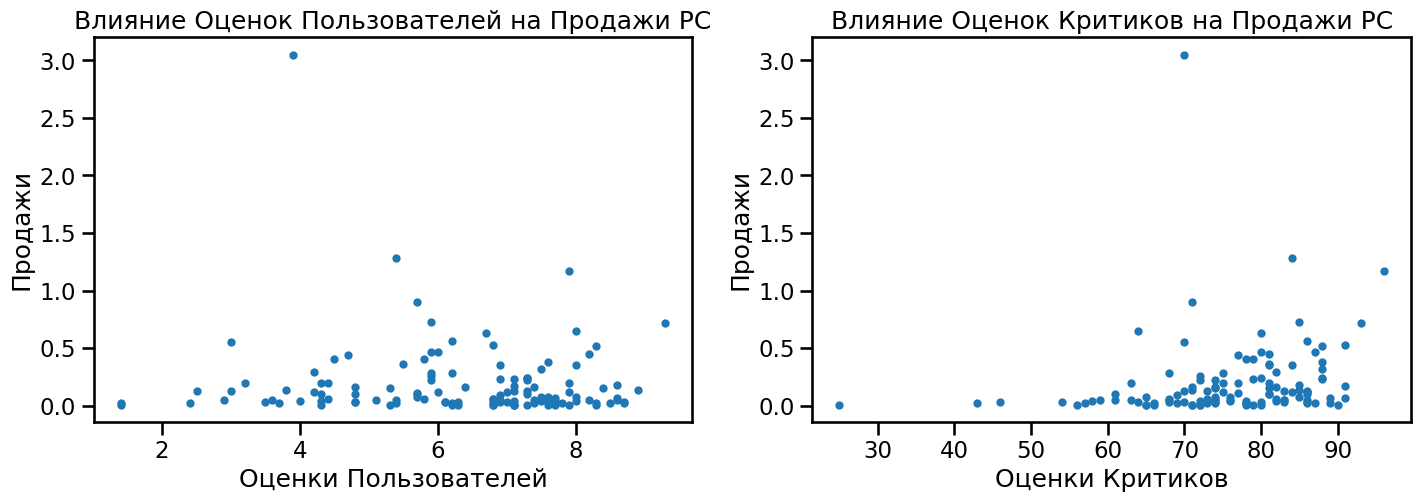

In [143]:
fig, axs = plt.subplots(1, 2, figsize=(17,5))
gdfa.query('platform == "PC"').plot.scatter(
    x='user_score', y='sales', ax=axs[0],
    xlabel='Оценки Пользователей', ylabel='Продажи', title='Влияние Оценок Пользователей на Продажи PC')
gdfa.query('platform == "PC"').plot.scatter(
    x='critic_score', y='sales', ax=axs[1],
    xlabel='Оценки Критиков', ylabel='Продажи', title='Влияние Оценок Критиков на Продажи PC');

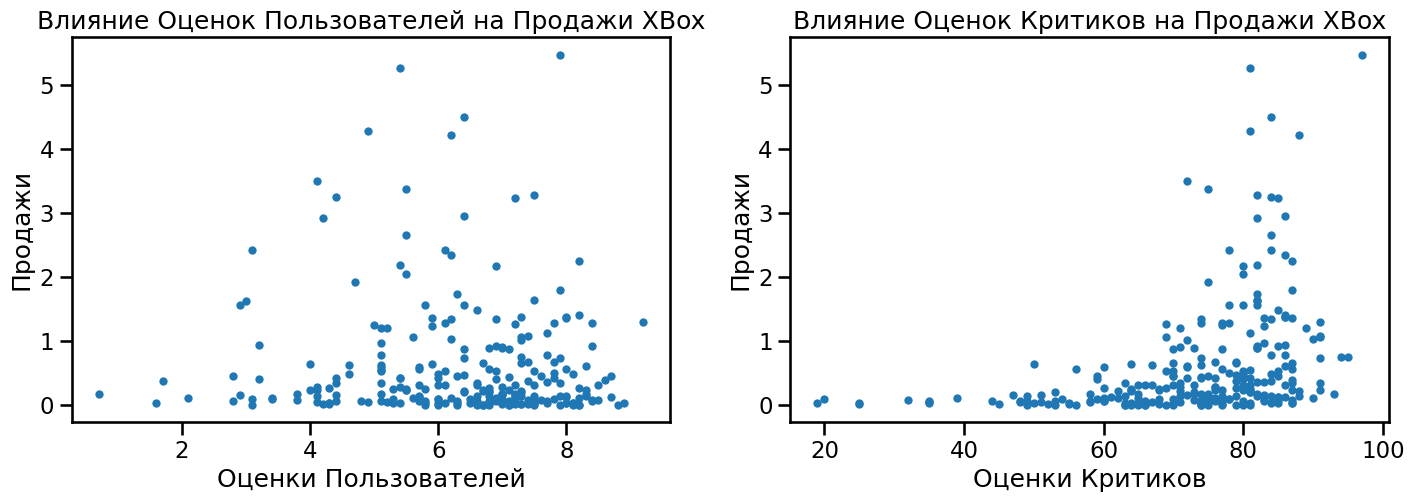

In [144]:
fig, axs = plt.subplots(1, 2, figsize=(17,5))
gdfa.query('platform == "X360" or platform == "XOne"').plot.scatter(
    x='user_score', y='sales', ax=axs[0],
    xlabel='Оценки Пользователей', ylabel='Продажи', title='Влияние Оценок Пользователей на Продажи XBox')
gdfa.query('platform == "X360" or platform == "XOne"').plot.scatter(
    x='critic_score', y='sales', ax=axs[1],
    xlabel='Оценки Критиков', ylabel='Продажи', title='Влияние Оценок Критиков на Продажи XBox');

**Вывод**  
Можем наблюдать ситуацию схожую с PS4 на большинстве платформ: значительная корреляции оценок критиков, практически никакой у оценок пользователей.   

Однако, платформы японской Nintendo (3DS, WiiU) показывают  некоторую корреляцию оценок пользователей. В то время как переносные платформы Sony(PSV), показывают низкую корреляцию и для оценок критиков, хотя здесь может сказываться сравнительно низкое количество информации об играх и продажах на них.

Скорее всего это говорит о разном подходе пользователей данных платформ к оценке игр перед покупкой. 

### 3.10. <a id='toc3_10_'></a>[Распределение игр и продаж по жанрам](#toc0_)

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

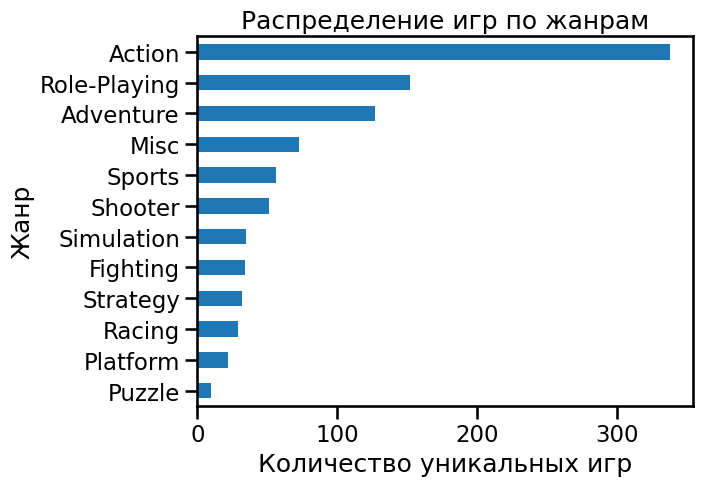

In [145]:
(
    gdfa.drop_duplicates(subset='name') # drop duplicate releases of the same game
    .genre.value_counts().sort_values(ascending=True)
    .plot.barh().set(title='Распределение игр по жанрам', xlabel='Количество уникальных игр', ylabel='Жанр')
);

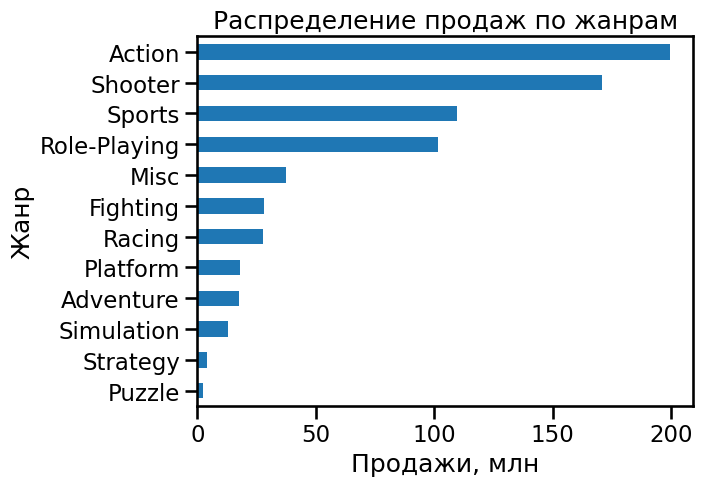

In [146]:
gdfa.groupby('genre').sales.sum().sort_values().plot.barh() \
.set(title='Распределение продаж по жанрам', xlabel='Продажи, млн', ylabel='Жанр');

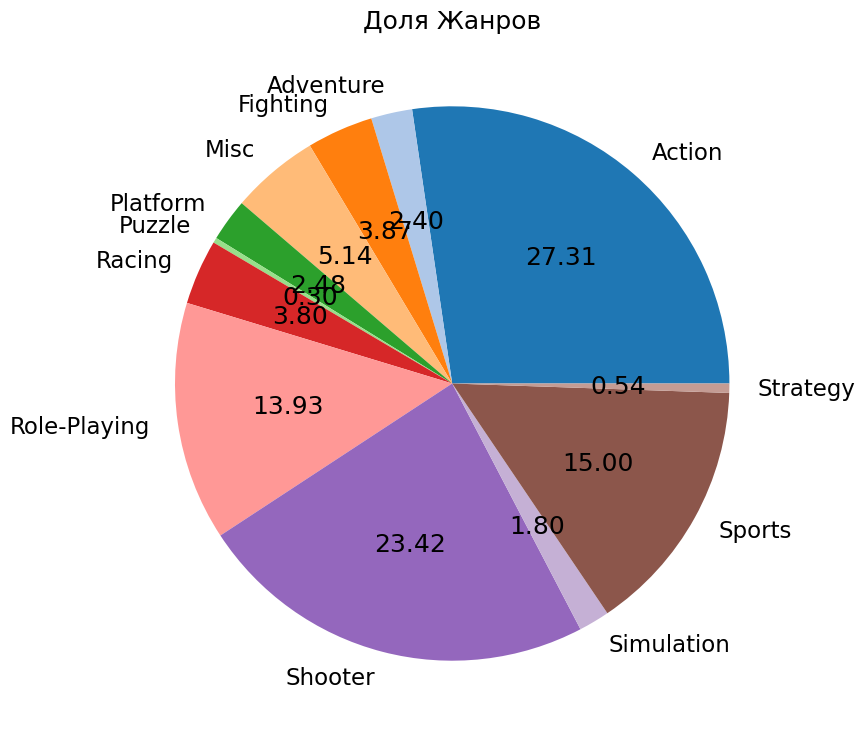

In [147]:
actual_genre_sales = gdfa.groupby('genre').sales.sum().sort_index()


actual_genre_sales.plot.pie(autopct='%.2f', title = "Доля Жанров", colors=plt.cm.tab20.colors, figsize = (9,9), ylabel='');


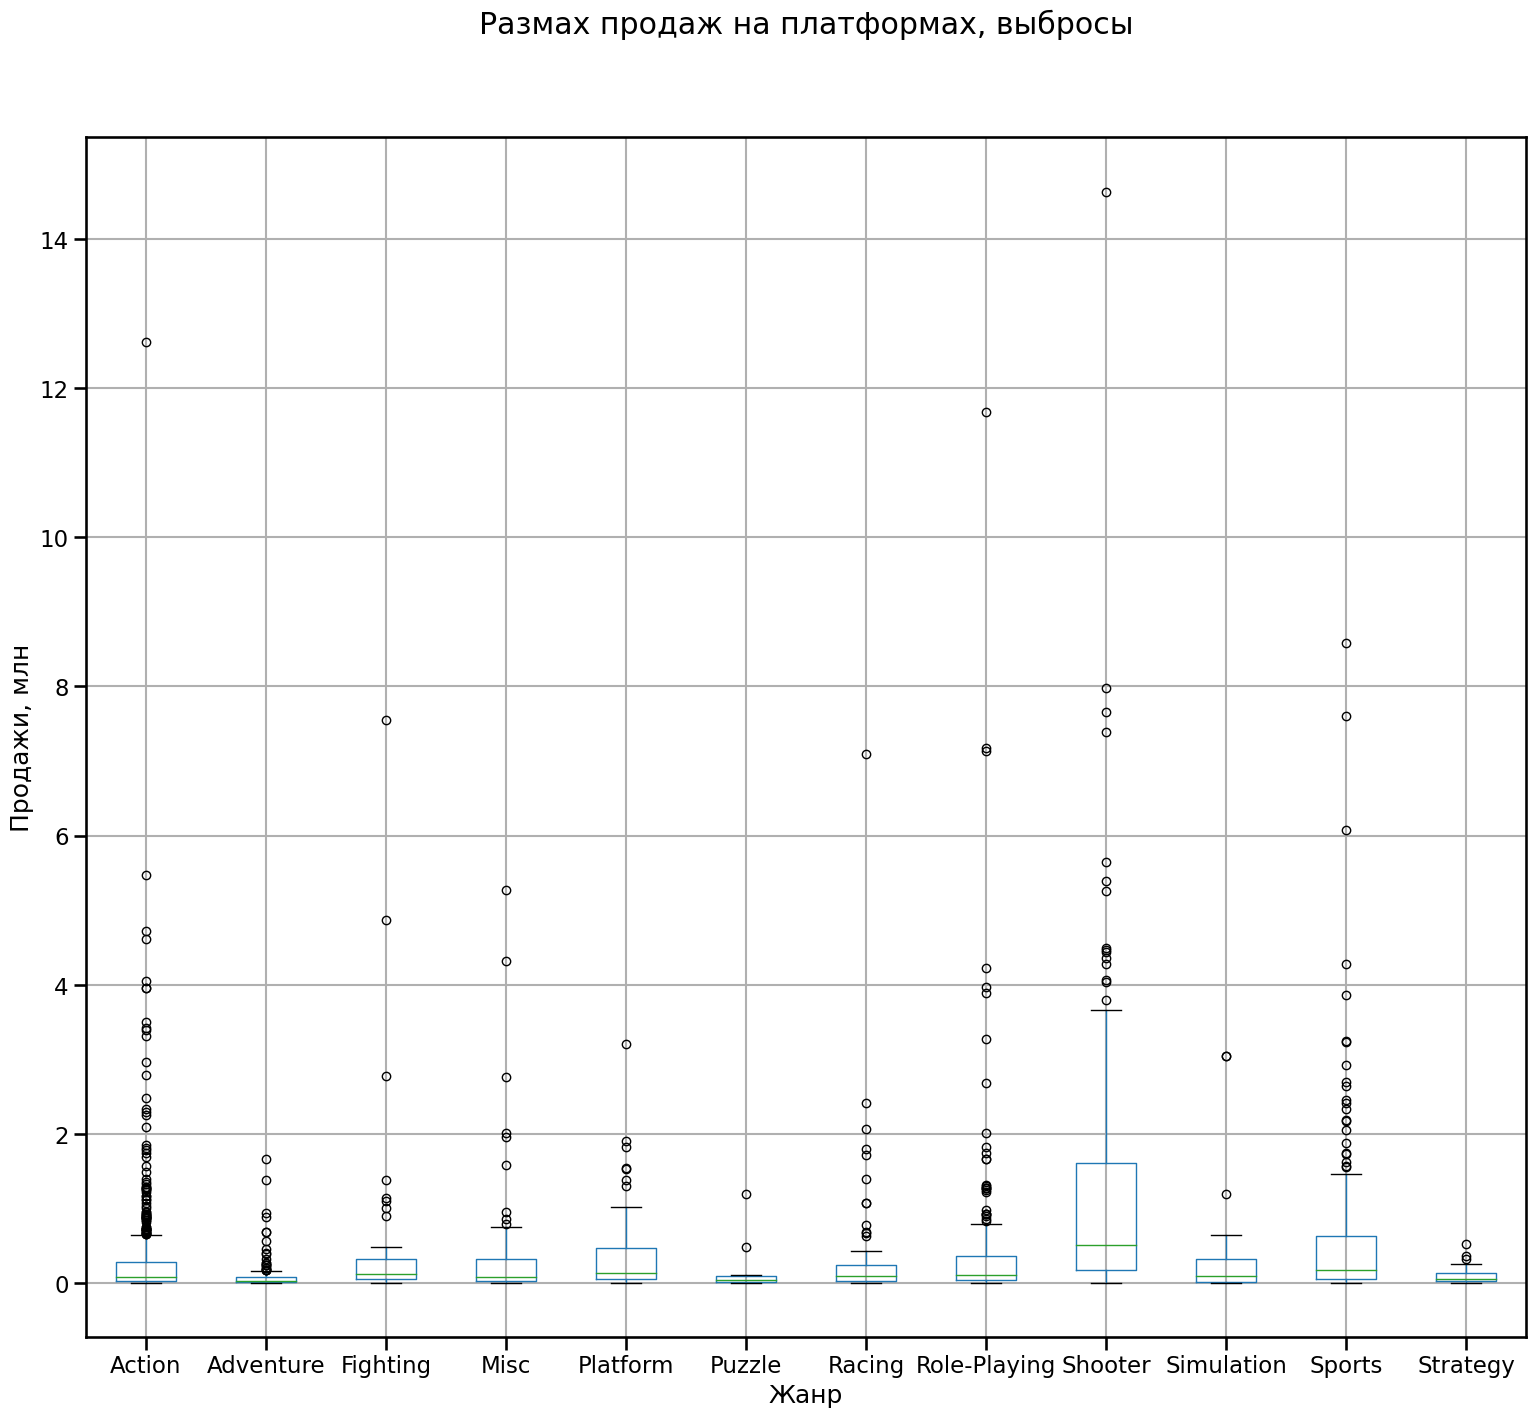

In [148]:
(
    gdfa.boxplot('sales', by='genre', figsize=(18,16))
    .set(xlabel='Жанр', title="", ylabel='Продажи, млн')
)
plt.suptitle('Размах продаж на платформах, выбросы');

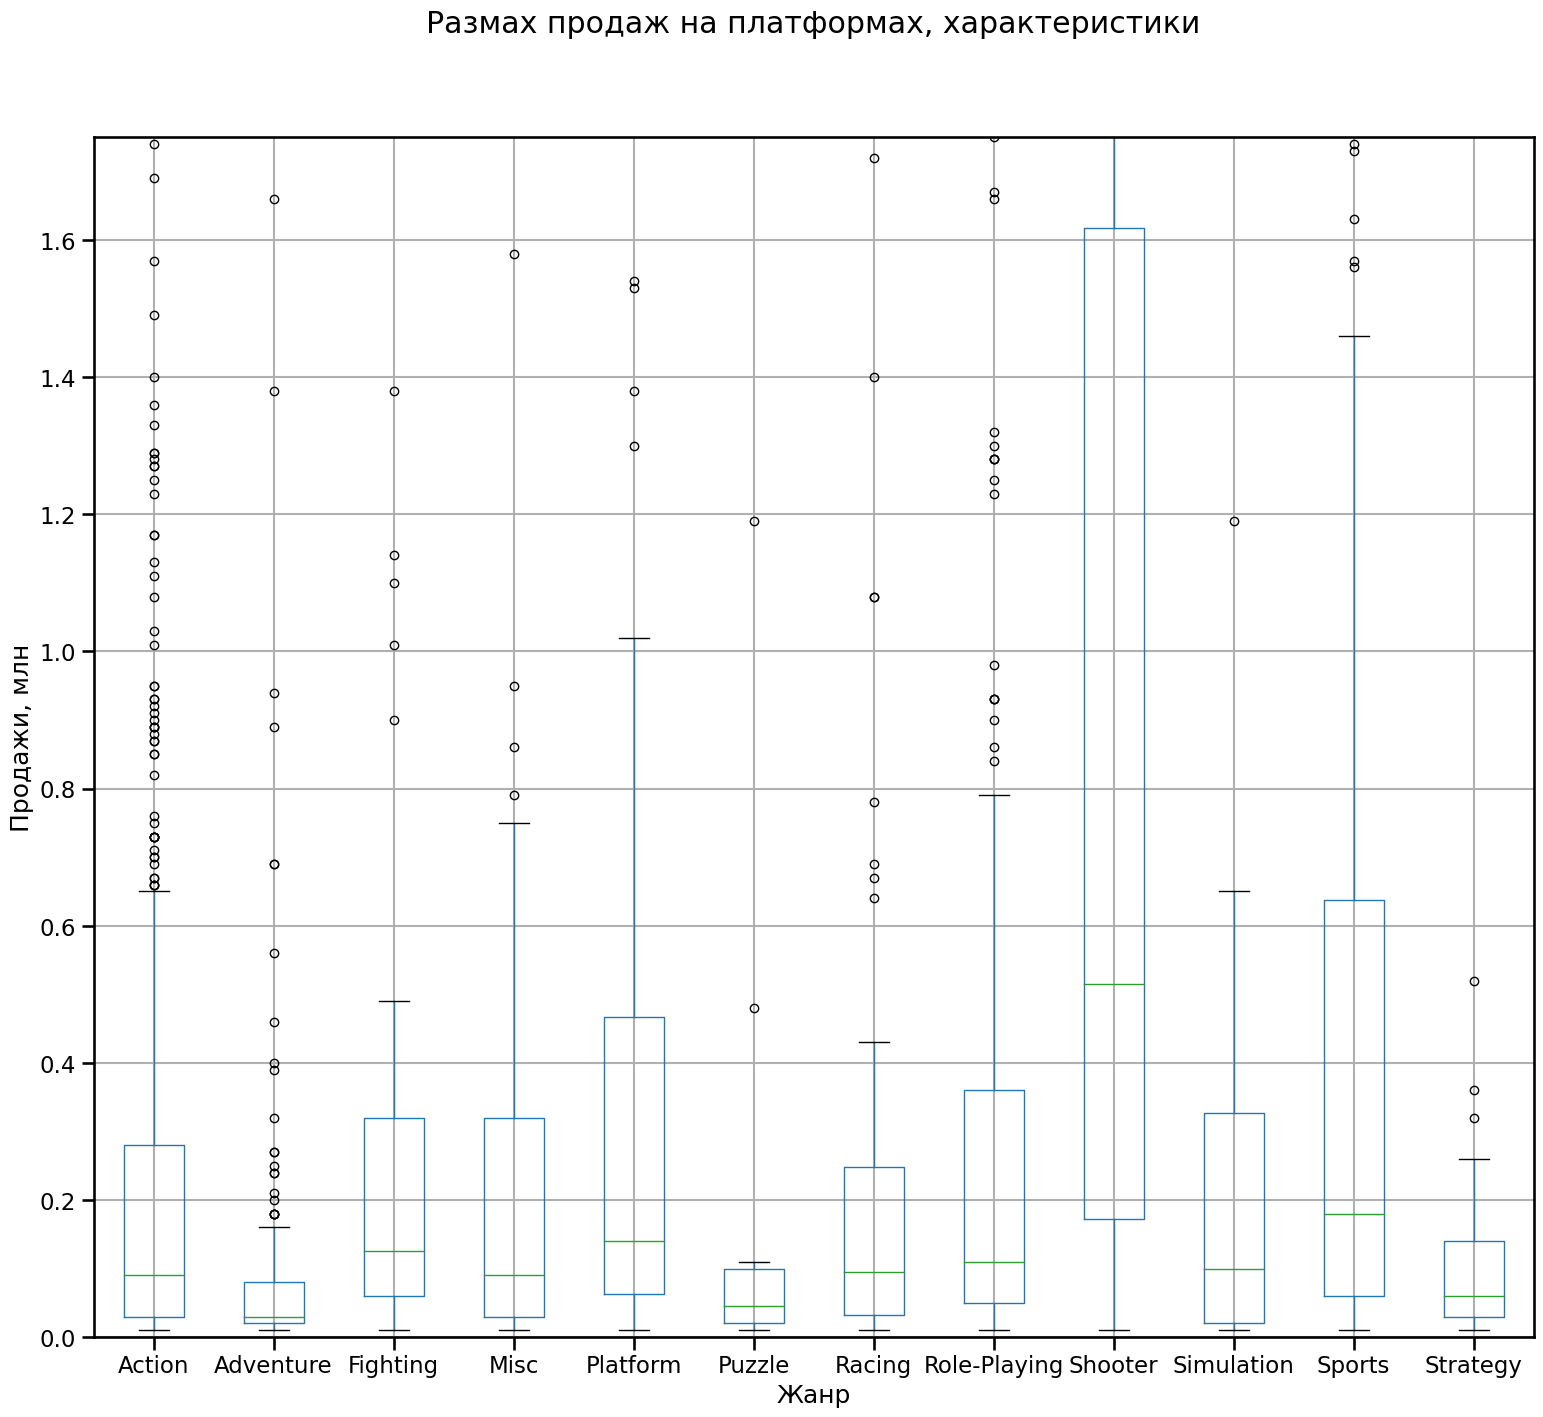

In [149]:
(
    gdfa.boxplot('sales', by='genre', figsize=(18,16))
    .set(ylim=(0,1.75), xlabel='Жанр', title="", ylabel='Продажи, млн')
)
plt.suptitle('Размах продаж на платформах, характеристики');

**Вывод**  
Мы можем увидеть что наиболее прибыльный жанр - `Action`, он также наиболее распространённый среди игр. `Shooter` занимают второе место по прибыльности, однако делают их не так уж и много. `Role-Playing` и `Sports`, приблизительно равны, однако ролевых игр выпускают в два раза больше. Возможно это связано с тем что спортивные симуляторы ограничены количеством популярных видов спорта и зачастую требуют многопользовательского режима, что увеличивает необходимое количество пользователей для успеха. Что то подомное может происходить из шутерами. `Puzzle` и `Strategy` показывают наименьшие показатели, что говорит о том что эти жанры нишевые.

Хитами могут похвастаться в основном жанры - лидеры, однако примечательны несколько хитов `Fighting`, что говорит о возможном наличие дополнительного спроса на жанр, но только к играм отвечающим критериям пользователей. Также интересно, что несмотря на более высокую поппулярность жанра `Action` в целом, у других топ жаннров - `Shooter`, `Role-Playing`, больше супер-хитов превшышающих 6 млн продаж, однако ниже этой метки количество берёт своё и жанр показывает высокие показатели.

Характеристики распределений позволяют увидеть что жанры `Shooter` и `Sports` показывают очень высокие стабильные показатели, в то время как `Action` имеет большое количество малоуспешных проектов и, таким образом, отстаёт по надёжности. Ряд жанров показывают хорошие показатели надёжности, это `Role-Playing', 'Fighting', 'Platform', 'Simulation', последние 3 показывают эти показатели при том что в целом мало популярны. Это может говорить о том что на них есть спрос которому не отвечает предложение, или что игроки предпочитающие эти жанров показывают высокий уровень лояльности им покупая большее количество игр чем пользователи в среднем.

## 4. <a id='toc4_'></a>[Портреты пользователей из разных регионов](#toc0_)

Создадим палитру цвертов для графиков

In [150]:
gdfa.groupby('platform').sales.sum().sort_values(ascending=False).index

Index(['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP'], dtype='object', name='platform')

In [151]:
platforms = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Other']
set1 = plt.cm.Set1.colors
platform_colours = {platforms[i]: set1[i] for i in range(len(platforms))}
print(list(platform_colours.keys()))      
sns.color_palette(platform_colours.values())

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Other']


[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [152]:
gdfa.groupby('genre').sales.sum().sort_values(ascending=False).index

Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc', 'Fighting',
       'Racing', 'Platform', 'Adventure', 'Simulation', 'Strategy', 'Puzzle'],
      dtype='object', name='genre')

In [153]:
genres = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc', 'Fighting', 'Racing', 'Other']
set1 = plt.cm.Set1.colors
genre_colours = {genres[i]: set1[i] for i in range(len(genres))}
print(list(genre_colours.keys()))      
sns.color_palette(genre_colours.values())

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc', 'Fighting', 'Racing', 'Other']


[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373)]

### 4.1. <a id='toc4_1_'></a>[Портрет пользователя NA](#toc0_)

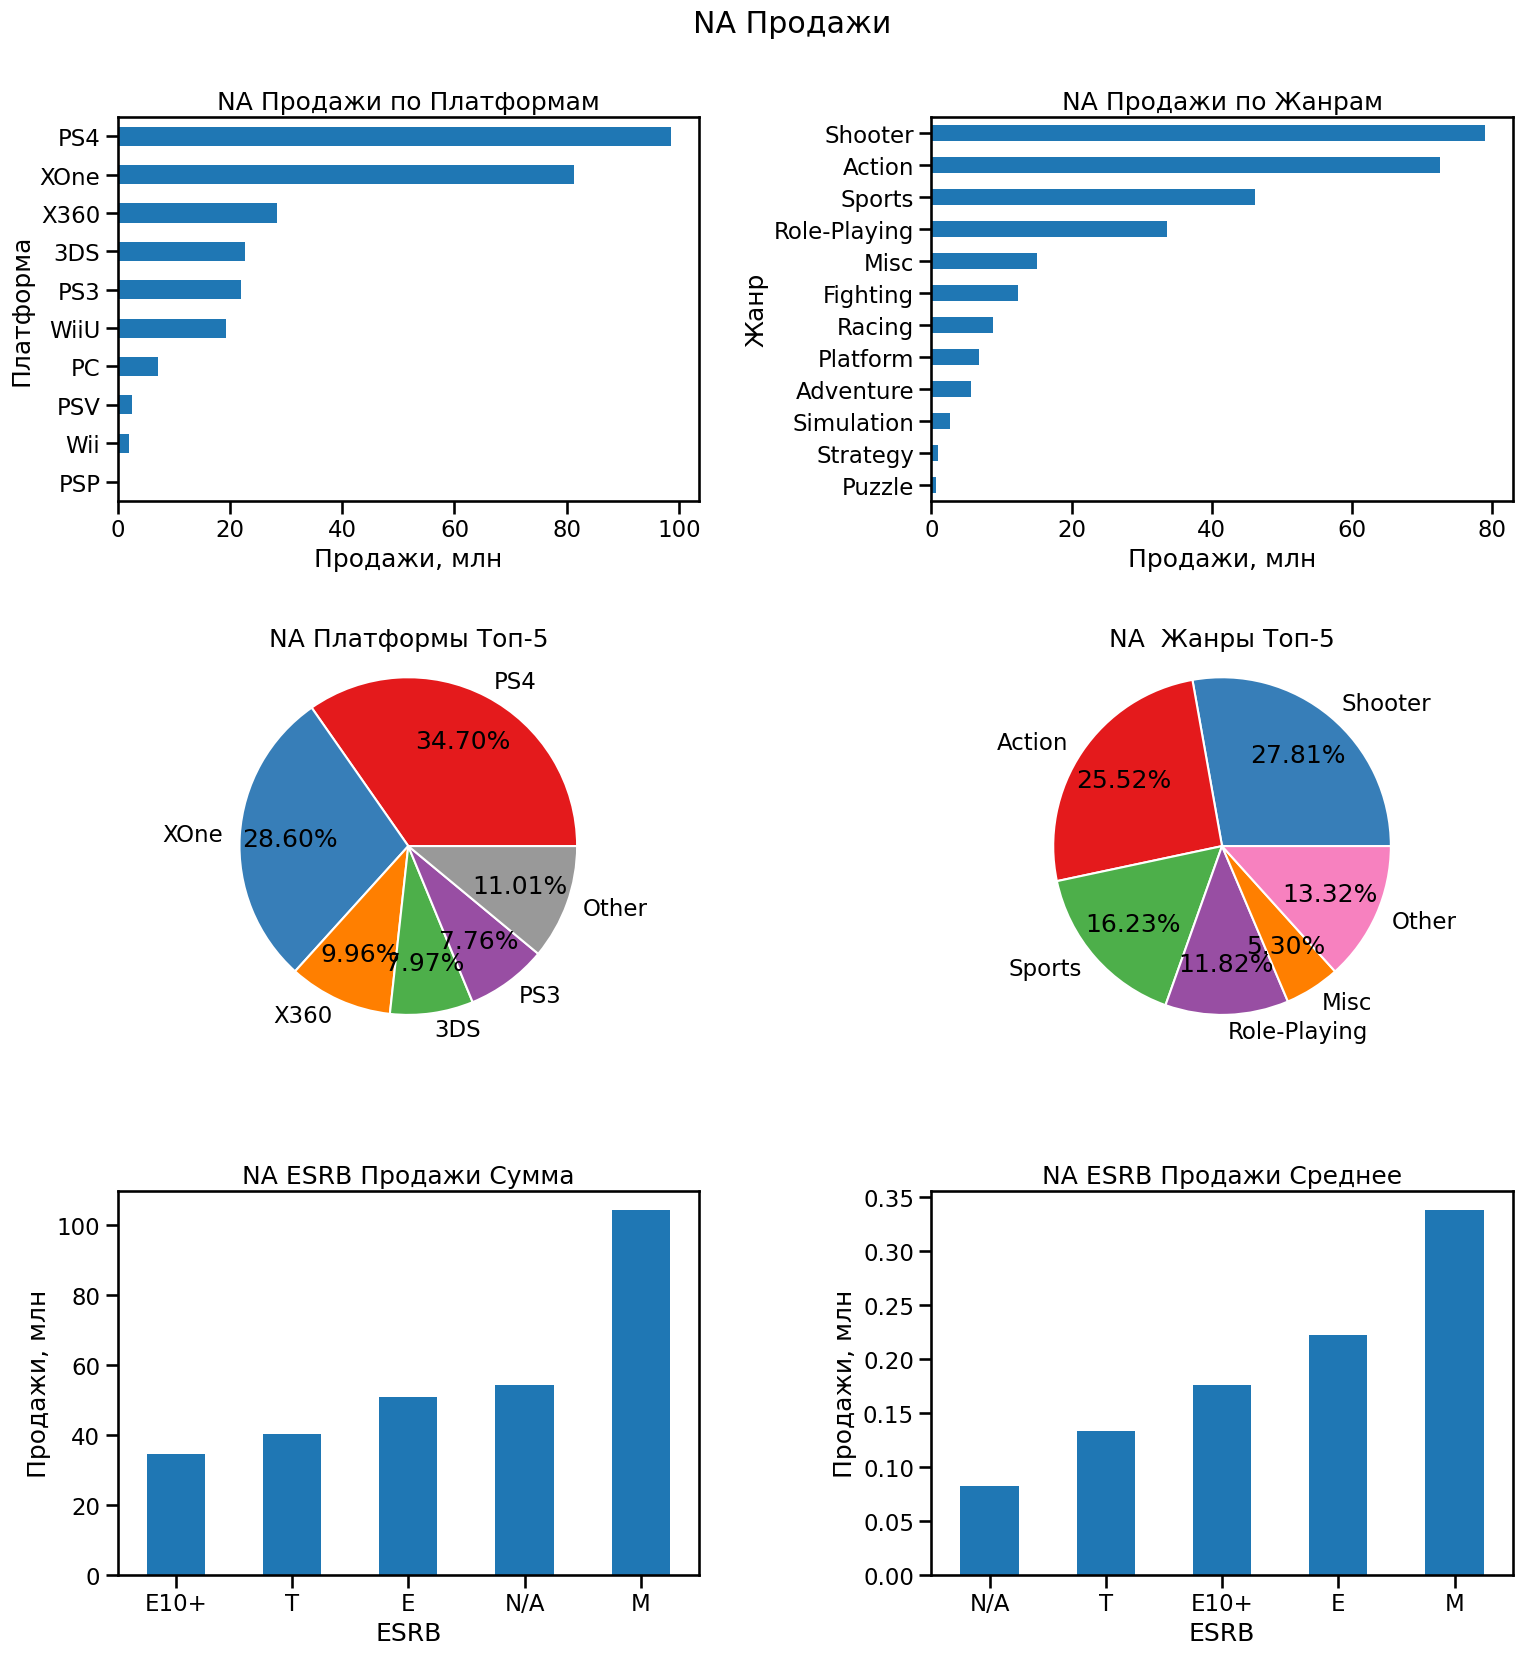

In [154]:
bottom_5ish_platform_NA = \
    pd.Series(gdfa.groupby('platform').na_sales.sum().sort_values(ascending=False)[5:].sum(), index=['Other'])
top_5_platform_NA = \
    gdfa.groupby('platform').na_sales.sum().sort_values(ascending=False)[:5].append(bottom_5ish_platform_NA)
bottom_5ish_genre_NA = \
    pd.Series(gdfa.groupby('genre').na_sales.sum().sort_values(ascending=False)[5:].sum(), index=['Other'])
top_5_genre_NA = \
    gdfa.groupby('genre').na_sales.sum().sort_values(ascending=False)[:5].append(bottom_5ish_genre_NA)

fig, axs = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('NA Продажи')
fig.subplots_adjust(top=0.92, wspace=0.4, hspace=0.4)

gdfa.groupby('platform').na_sales.sum().sort_values().plot.barh(
    ax=axs[0,0]).set(ylabel='Платформа', xlabel='Продажи, млн', title = 'NA Продажи по Платформам')
gdfa.groupby('genre').na_sales.sum().sort_values().plot.barh(
    ax=axs[0,1]).set(ylabel='Жанр', xlabel='Продажи, млн', title = 'NA Продажи по Жанрам')
top_5_platform_NA.plot.pie(
    ax=axs[1,0], wedgeprops = {"edgecolor":"w"}, pctdistance=0.7, radius=1.1, 
    colors=[platform_colours[key] for key in top_5_platform_NA.index],
    autopct='%.2f%%').set(ylabel='', title = 'NA Платформы Топ-5')
top_5_genre_NA.plot.pie(
    ax=axs[1,1], wedgeprops = {"edgecolor":"w"}, pctdistance=0.7, radius=1.1, 
    colors=[genre_colours[key] for key in top_5_genre_NA.index],
     autopct='%.2f%%').set(ylabel='', title = 'NA  Жанры Топ-5')
gdfa.groupby('rating').na_sales.sum().sort_values().plot.bar(
    rot=0, ax=axs[2,0]).set(xlabel='ESRB', ylabel='Продажи, млн', title = 'NA ESRB Продажи Сумма')
gdfa.groupby('rating').na_sales.mean().sort_values().plot.bar(
    rot=0, ax=axs[2,1]).set(xlabel='ESRB', ylabel='Продажи, млн', title = 'NA ESRB Продажи Среднее');
#Mean instead of Median because we care about outliers

**Вывод**  
Пользователи из Северной Америки играют на консолях XBOX больше чем Playstation. PC имеет довольно маленький сегмент, даже меньше чем 3DS. 

Предпочитают `Action` и `Shooter` жанры, за которыми следом идут `Sport` и `Role-Playing`.

Большинство игр имеют рейтинг "ESRB". Игры без рейтинга показывают низкие средние показатели продаж. Примечательно что игры с рейтингом T менее популярны чем E, особенно если рассматривать E10+ и E как одну категорию - обе для всех членов семьи, хоть последние и могут включают низкий уровень насилия или несколько откровенные сцены. Rating M примечателен, тем что имеет в полтора раза большее среднее значение по количеству продаж, чем остальные.

### 4.2. <a id='toc4_2_'></a>[Портрет пользователя EU](#toc0_)

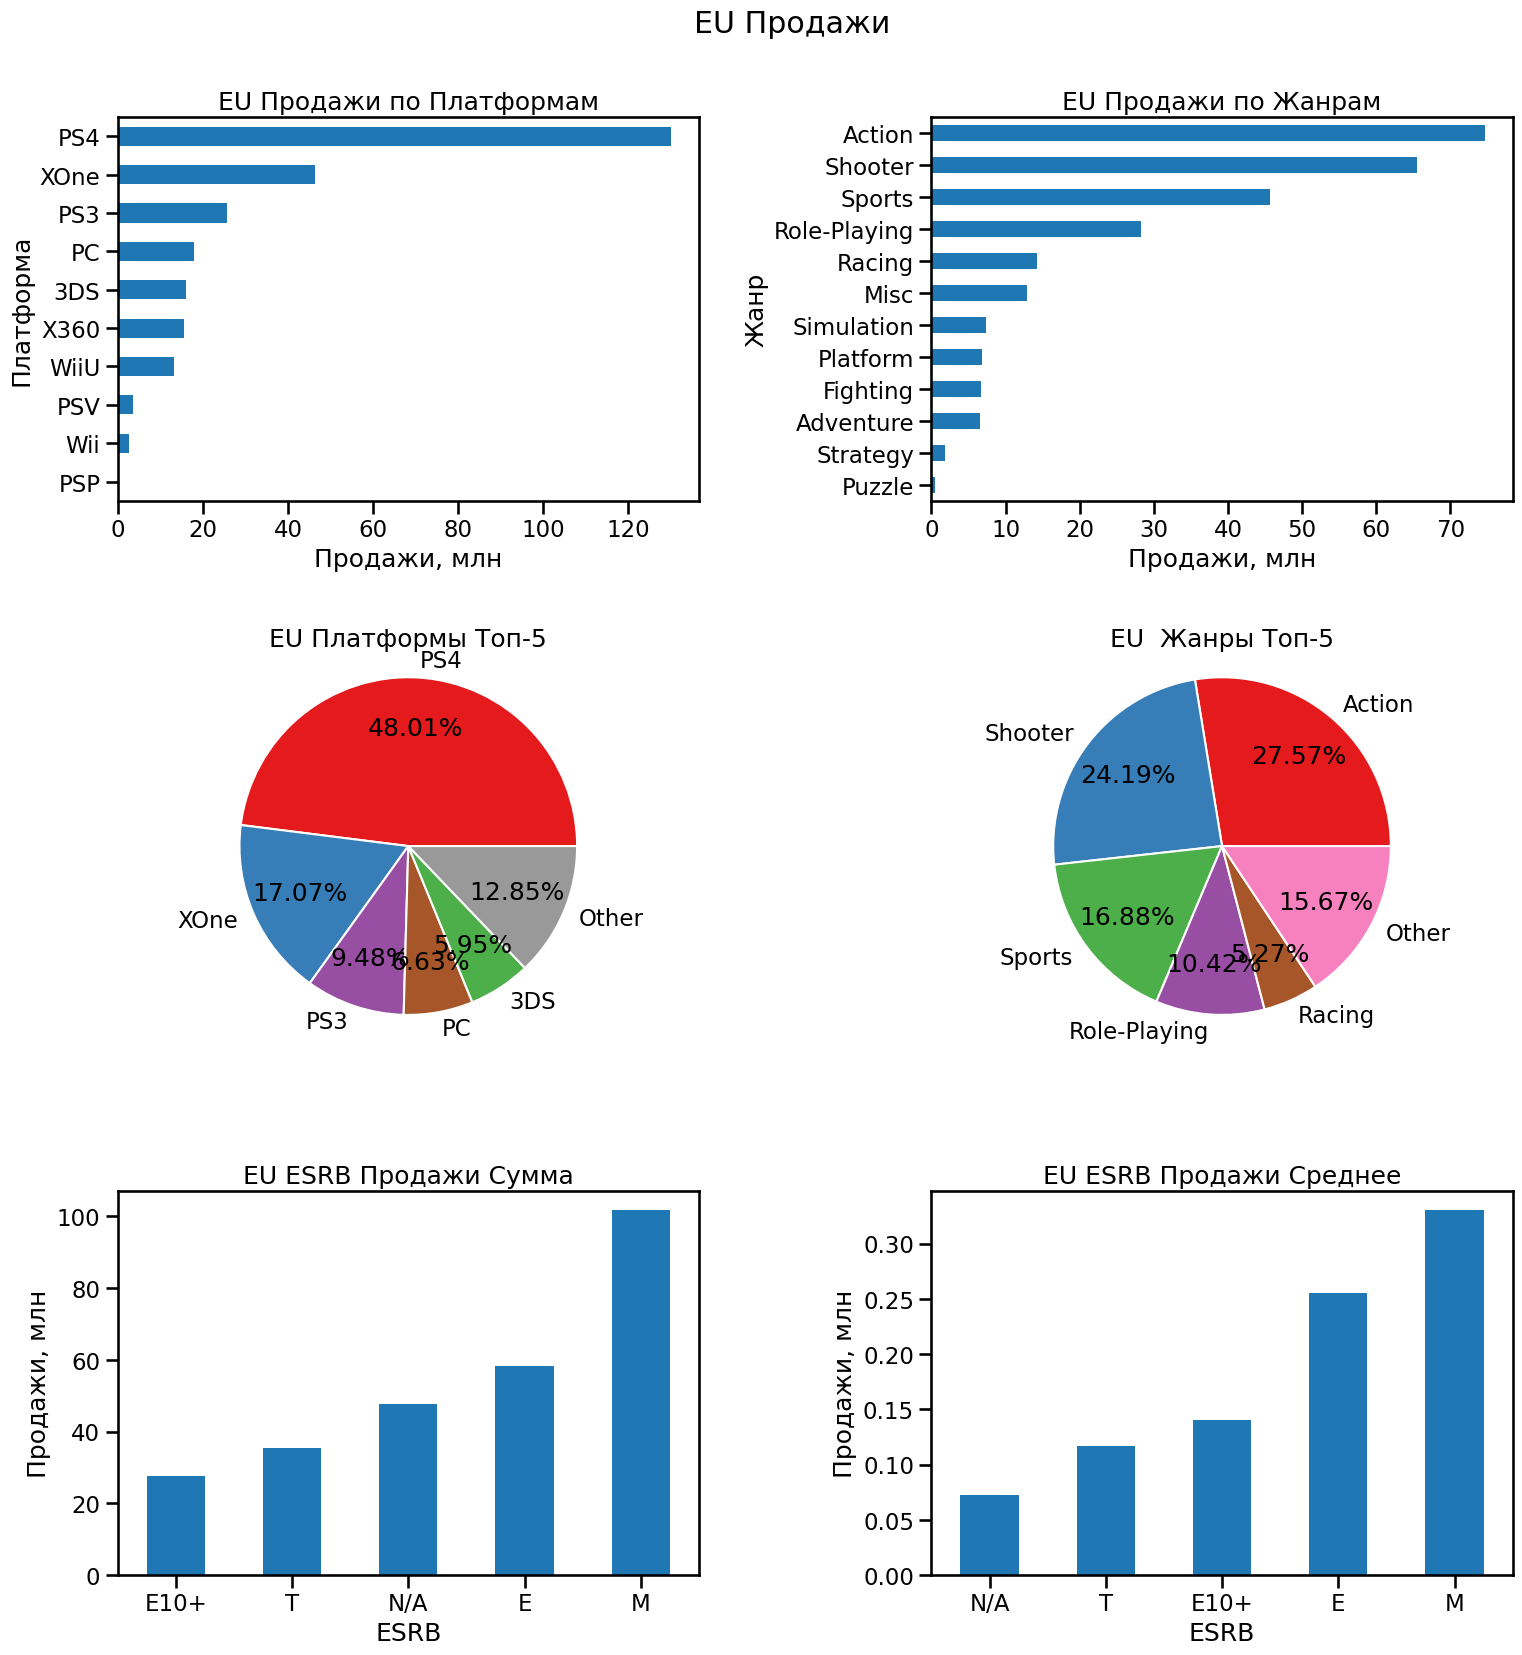

In [155]:
bottom_5ish_platform_EU = \
    pd.Series(gdfa.groupby('platform').eu_sales.sum().sort_values(ascending=False)[5:].sum(), index=['Other'])
top_5_platform_EU = \
    gdfa.groupby('platform').eu_sales.sum().sort_values(ascending=False)[:5].append(bottom_5ish_platform_EU)
bottom_5ish_genre_EU = \
    pd.Series(gdfa.groupby('genre').eu_sales.sum().sort_values(ascending=False)[5:].sum(), index=['Other'])
top_5_genre_EU = \
    gdfa.groupby('genre').eu_sales.sum().sort_values(ascending=False)[:5].append(bottom_5ish_genre_EU)

fig, axs = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('EU Продажи')
fig.subplots_adjust(top=0.92, wspace=0.4, hspace=0.4)

gdfa.groupby('platform').eu_sales.sum().sort_values().plot.barh(
    ax=axs[0,0]).set(ylabel='Платформа', xlabel='Продажи, млн', title = 'EU Продажи по Платформам')
gdfa.groupby('genre').eu_sales.sum().sort_values().plot.barh(
    ax=axs[0,1]).set(ylabel='Жанр', xlabel='Продажи, млн', title = 'EU Продажи по Жанрам')
top_5_platform_EU.plot.pie(
    ax=axs[1,0], wedgeprops = {"edgecolor":"w"}, pctdistance=0.7, radius=1.1, 
    colors=[platform_colours[key] for key in top_5_platform_EU.index],
    autopct='%.2f%%').set(ylabel='', title = 'EU Платформы Топ-5')
top_5_genre_EU.plot.pie(
    ax=axs[1,1], wedgeprops = {"edgecolor":"w"}, pctdistance=0.7, radius=1.1, 
    colors=[genre_colours[key] for key in top_5_genre_EU.index],
     autopct='%.2f%%').set(ylabel='', title = 'EU  Жанры Топ-5')
gdfa.groupby('rating').eu_sales.sum().sort_values().plot.bar(
    rot=0, ax=axs[2,0]).set(xlabel='ESRB', ylabel='Продажи, млн', title = 'EU ESRB Продажи Сумма')
gdfa.groupby('rating').eu_sales.mean().sort_values().plot.bar(
    rot=0, ax=axs[2,1]).set(xlabel='ESRB', ylabel='Продажи, млн', title = 'EU ESRB Продажи Среднее');
#Mean instead of Median because we care about outliersf

**Вывод**  
В Европе мы наблюдаем очень схожую картину с Америкой с парой значимых отклонений, что говорит о высоком уровне культурных связей. 

Гораздо большую роль играют Playstation - обе крупные консоли превосходят XBOX, особенно примечательно в отношении XBOX One - XBOX последнего поколения, это может говорить о победе Playstation в соревновании за европейских пользователей в новом консольном поколении. PC также имеет значимую роль, и даже превосходит XOne по продажам. 

По жанрам, с другой стороны, картина практически идентична: Пользователи предпочитают `Action` и `Shooter` жанры, за которыми следом идут `Sport` и `Role-Playing`. 

Большинство игр имеют рейтинг "ESRB", хотя игр без рейтинга продаётся чуть больше чем в Америке. Влияние ESRB близко к американскому: Игры без рейтинга показывают низкие средние показатели продаж. Игр без рейтинга продаётся мало, игры с рейтингом T менее популярны чем E, особенно если рассматривать E10+ и E как одну категорию. Rating M здесь также показывает лучшие средние показатели.

### 4.3. <a id='toc4_3_'></a>[Портрет пользователя JP](#toc0_)

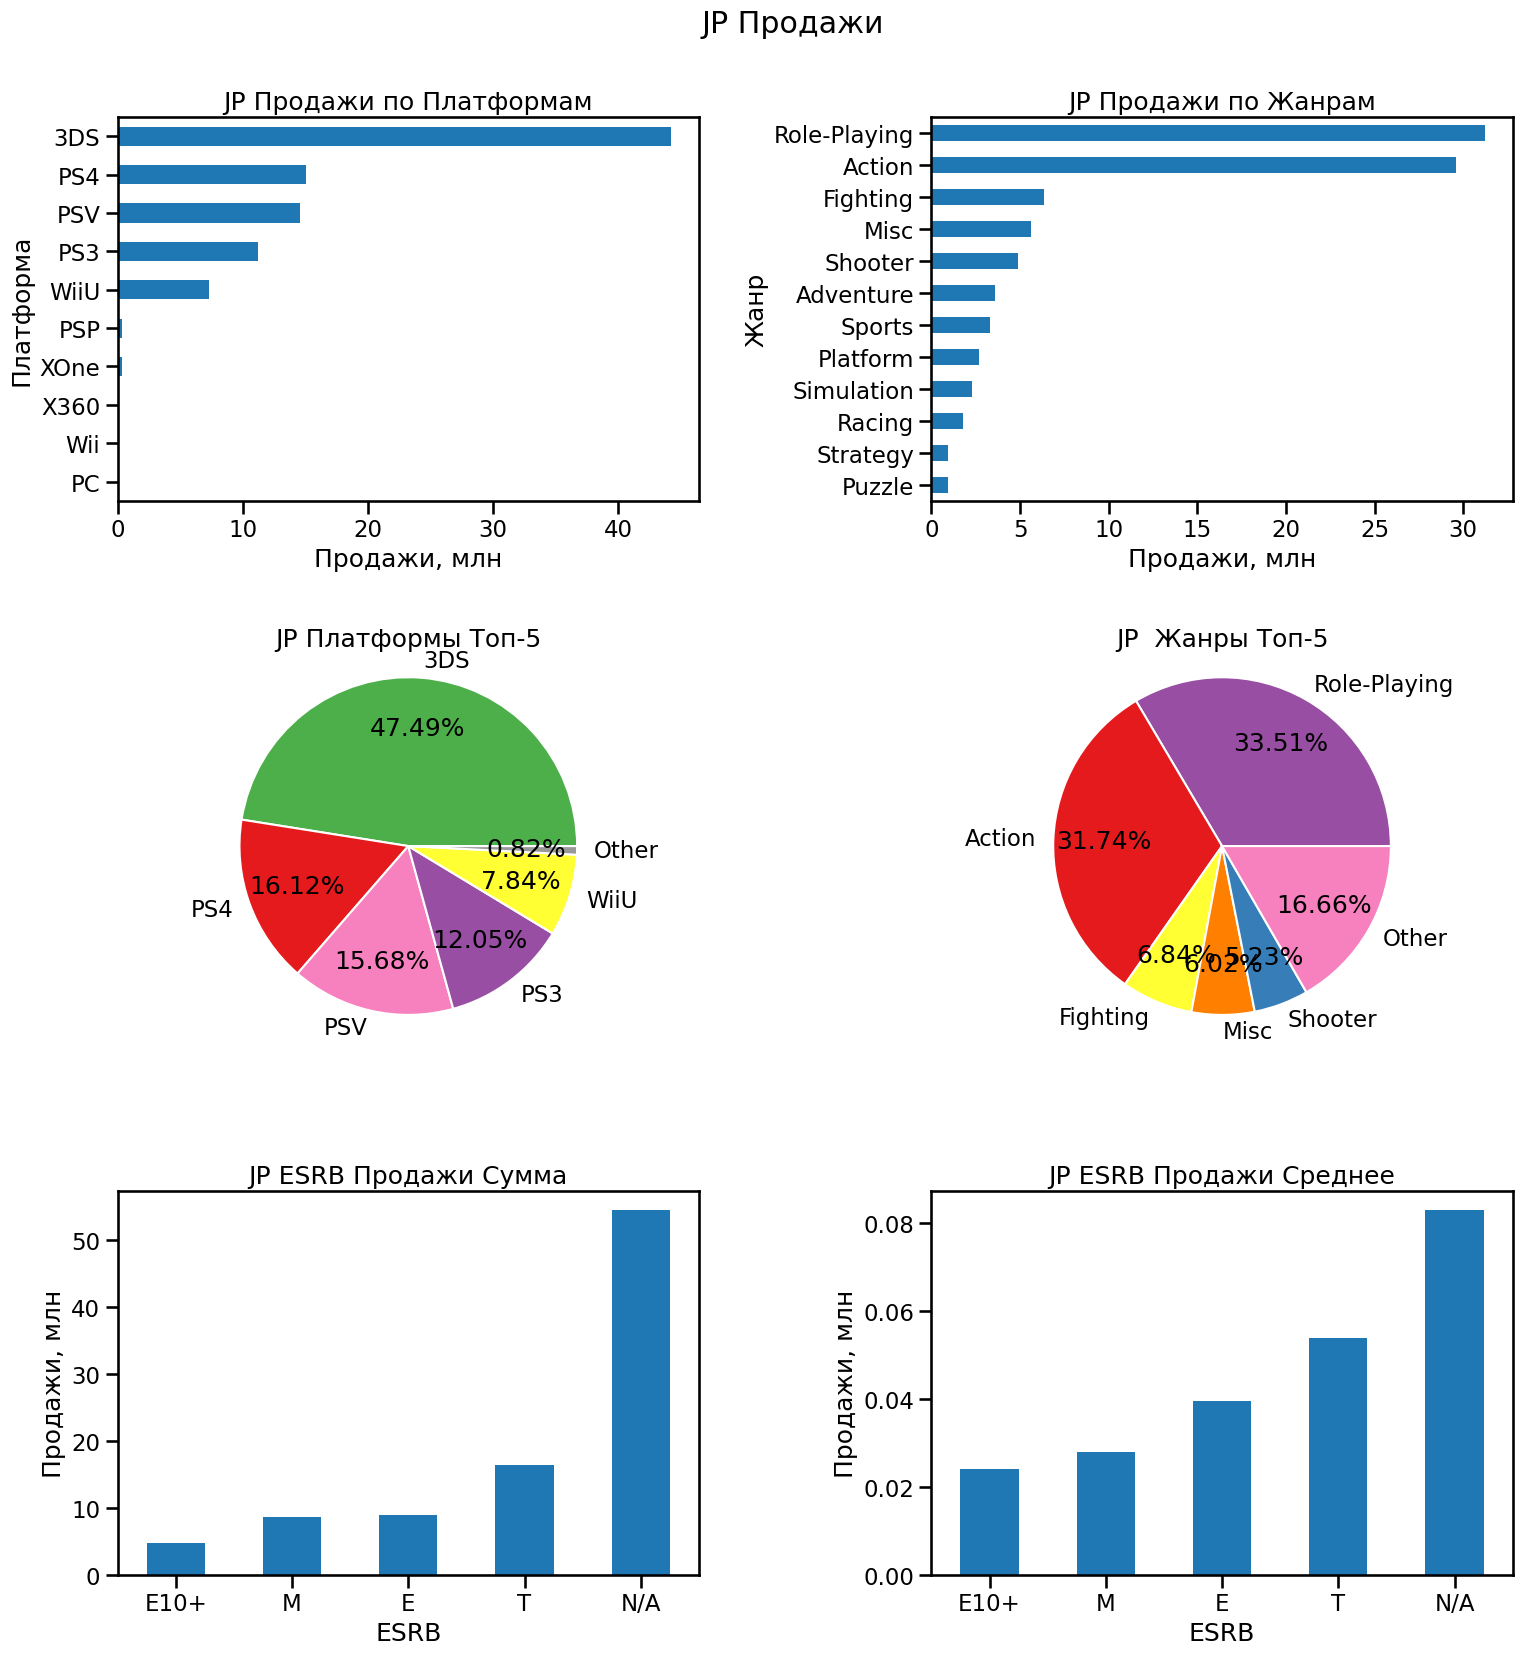

In [156]:
bottom_5ish_platform_JP = \
    pd.Series(gdfa.groupby('platform').jp_sales.sum().sort_values(ascending=False)[5:].sum(), index=['Other'])
top_5_platform_JP = \
    gdfa.groupby('platform').jp_sales.sum().sort_values(ascending=False)[:5].append(bottom_5ish_platform_JP)
bottom_5ish_genre_JP = \
    pd.Series(gdfa.groupby('genre').jp_sales.sum().sort_values(ascending=False)[5:].sum(), index=['Other'])
top_5_genre_JP = \
    gdfa.groupby('genre').jp_sales.sum().sort_values(ascending=False)[:5].append(bottom_5ish_genre_JP)

fig, axs = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('JP Продажи')
fig.subplots_adjust(top=0.92, wspace=0.4, hspace=0.4)

gdfa.groupby('platform').jp_sales.sum().sort_values().plot.barh(
    ax=axs[0,0]).set(ylabel='Платформа', xlabel='Продажи, млн', title = 'JP Продажи по Платформам')
gdfa.groupby('genre').jp_sales.sum().sort_values().plot.barh(
    ax=axs[0,1]).set(ylabel='Жанр', xlabel='Продажи, млн', title = 'JP Продажи по Жанрам')
top_5_platform_JP.plot.pie(
    ax=axs[1,0], wedgeprops = {"edgecolor":"w"}, pctdistance=0.7, radius=1.1, 
    colors=[platform_colours[key] for key in top_5_platform_JP.index],
    autopct='%.2f%%').set(ylabel='', title = 'JP Платформы Топ-5')
top_5_genre_JP.plot.pie(
    ax=axs[1,1], wedgeprops = {"edgecolor":"w"}, pctdistance=0.7, radius=1.1, 
    colors=[genre_colours[key] for key in top_5_genre_JP.index],
     autopct='%.2f%%').set(ylabel='', title = 'JP  Жанры Топ-5')
gdfa.groupby('rating').jp_sales.sum().sort_values().plot.bar(
    rot=0, ax=axs[2,0]).set(xlabel='ESRB', ylabel='Продажи, млн', title = 'JP ESRB Продажи Сумма')
gdfa.groupby('rating').jp_sales.mean().sort_values().plot.bar(
    rot=0, ax=axs[2,1]).set(xlabel='ESRB', ylabel='Продажи, млн', title = 'JP ESRB Продажи Среднее');
#Mean instead of Median because we care about outliers

**Вывод**  
Ситуация в Японии значительно отличается. 

Здесь доминирует японское Nintendo 3DS - переносная консоль, вторым идёт Playstation, примечательна также высокая популярность переносных консолей последней(PSP, PSV, Wii, WiiU). PC, XOne и XBox практически не представлены на рынке.

Также при оценке рынка следует помнить что пользователи Nintntendo гораздо большее внимание уделяют оценкам других пользователей, что может говорить о наличии такой тенденции среди японских пользователей в целом, хотя скорее всего, если это есть, это ограничено внутренними ресурсами информации. 

Наиболее популярным жанром  является `Role-Playing`. `Action` занимает почётное второе место. В то время как `Sports` и `Shooter` падают до уровня медианных значений. Популярность жанра Role-Playing обусловлена поджанром JRPG - яп. ролевые игры. Многие из которых даже не переводятся с японского и обладают огромной популярностью у себя дома. Низкий, сравнительно, спрос на спорт скорее всего ассоциирован с отсутствием широко распространённого популяризированного спорта, таких как бейсбол и Американский футбол в США и футбол в Европе. Наиболее популярный спорт в Японии бейсбол, что интересно учитывая что в Америке он теперь на втором месте, но в целом видимо интерес к спорту ниже. Отсутствие популярности `Shooter` возможно объясняется демилитаризацией. 

Большинство продаваемых игр не имеют рейтинг ESRB (ESRB - Северо-Американыская организация, влияение которой на европу обусловлено близкими культурными связями), средние продажи выше у игр без него, особенно интересно что рейтинг M продаётся хуже E и T, что сильно отличается от картины в других регионах, хотя учитывая низкое значение рейтинга в целом имеет малую значимость.


### 4.4. <a id='toc4_4_'></a>[Топ-5 Сравнение Платформ](#toc0_)

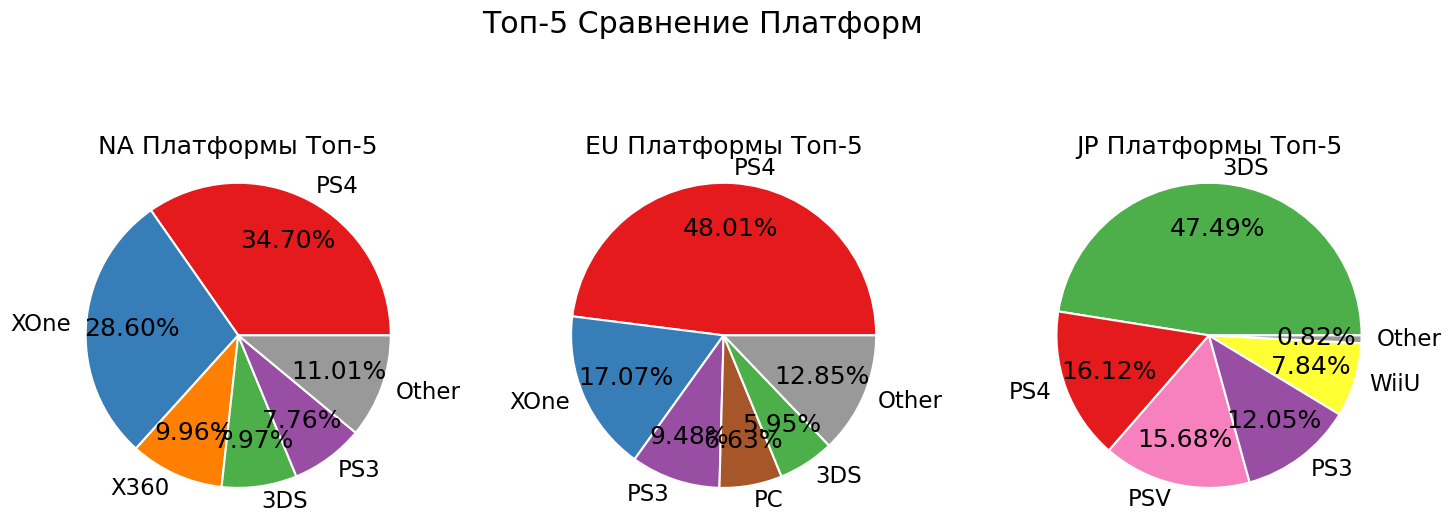

In [157]:
fig, axs = plt.subplots(1, 3, figsize=(17, 7))
fig.suptitle('Топ-5 Сравнение Платформ')
fig.subplots_adjust(top=0.92, wspace=0.4, hspace=0.4)

top_5_platform_NA.plot.pie(
    ax=axs[0], wedgeprops = {"edgecolor":"w"}, pctdistance=0.7, radius=1.1, 
    colors=[platform_colours[key] for key in top_5_platform_NA.index],
    autopct='%.2f%%').set(ylabel='', title = 'NA Платформы Топ-5')
top_5_platform_EU.plot.pie(
    ax=axs[1], wedgeprops = {"edgecolor":"w"}, pctdistance=0.7, radius=1.1, 
    colors=[platform_colours[key] for key in top_5_platform_EU.index],
     autopct='%.2f%%').set(ylabel='', title = 'EU Платформы Топ-5')
top_5_platform_JP.plot.pie(
    ax=axs[2], wedgeprops = {"edgecolor":"w"}, pctdistance=0.7, radius=1.1, 
    colors=[platform_colours[key] for key in top_5_platform_JP.index],
     autopct='%.2f%%').set(ylabel='', title = 'JP Платформы Топ-5');


**Вывод**

XOne популярен в северной америке, играет роль в европе, и выполняет роль статистической ошибки в Японии. X360 = предыдущее поколение, выделяется только у себя дома, в Сев. Америе. PS4 Занимает значительную роль на всех рынках и доминирует на двух из трёх. Примечательно что PS3 занимает близкую долю, около 10% на всех рынках. В Японии большую роль играют портативные консоли WiiU, PSV, 3DS, из них 3DS доминирует. Также любопытно что в японии топ 5 это практически 100% продаж, что говорит о том что конкурентам, PC и Xbox, не удаётся зайти на рынок. PC в топ 5 представлен только в европе.

### 4.5. <a id='toc4_5_'></a>[Топ-5 Сравнение Жанров](#toc0_)

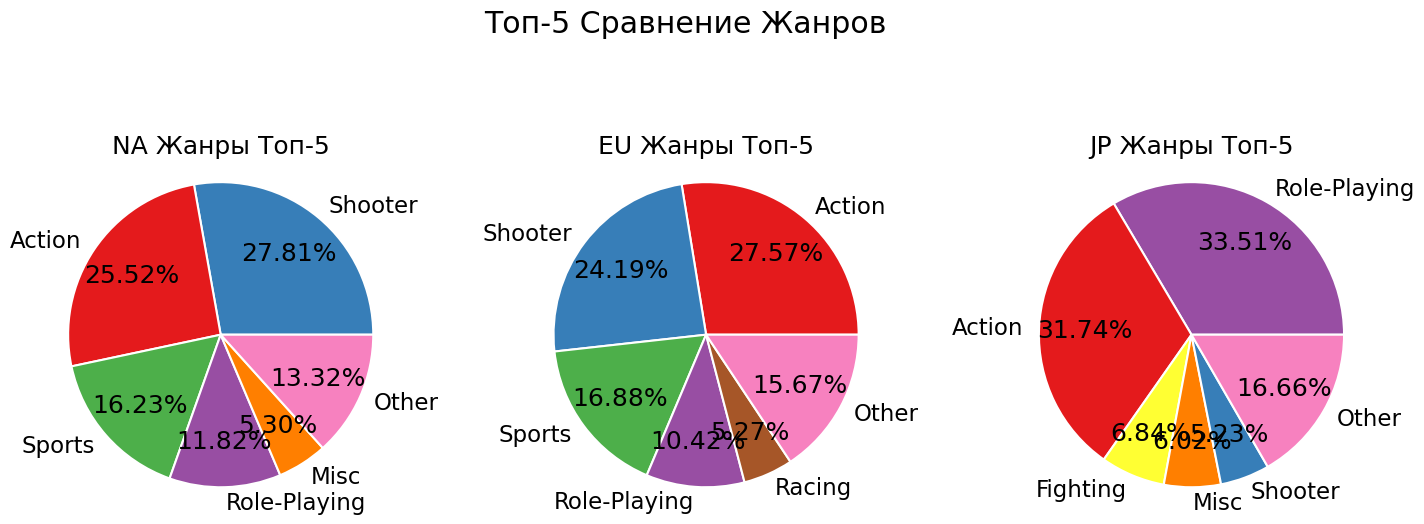

In [158]:
fig, axs = plt.subplots(1, 3, figsize=(17, 7))
fig.suptitle('Топ-5 Сравнение Жанров')
fig.subplots_adjust(top=0.92, wspace=0.4, hspace=0.4)

top_5_genre_NA.plot.pie(
    ax=axs[0], wedgeprops = {"edgecolor":"w"}, pctdistance=0.7, radius=1.1, 
    colors=[genre_colours[key] for key in top_5_genre_NA.index],
    autopct='%.2f%%').set(ylabel='', title = 'NA Жанры Топ-5')
top_5_genre_EU.plot.pie(
    ax=axs[1], wedgeprops = {"edgecolor":"w"}, pctdistance=0.7, radius=1.1, 
    colors=[genre_colours[key] for key in top_5_genre_EU.index],
     autopct='%.2f%%').set(ylabel='', title = 'EU Жанры Топ-5')
top_5_genre_JP.plot.pie(
    ax=axs[2], wedgeprops = {"edgecolor":"w"}, pctdistance=0.7, radius=1.1, 
    colors=[genre_colours[key] for key in top_5_genre_JP.index],
     autopct='%.2f%%').set(ylabel='', title = 'JP Жанры Топ-5');


**Вывод**
`Action` Занимает близок к лидерству во всех регионах. `Shooter` и `Sports` играют большую роль на рынках, кроме Японского.
`Role-Playing` лидирует в Японии и достойно представлен в NA и EU. Присутствие на графиках японии и америки `Misc` - игр не впадающих в какойто один жанр, и большая роль `Other` - не попавших в топ-5 жанров, говорят о значительном интересе к менее популярным, нишевым проектам. Возможно имеет смысл сделать некоторый акцент на потенциальных хитах рынка независимой разработки игр.

## 5. <a id='toc5_'></a>[Проверка  гипотез](#toc0_)

Размах пользовательского рейтинга

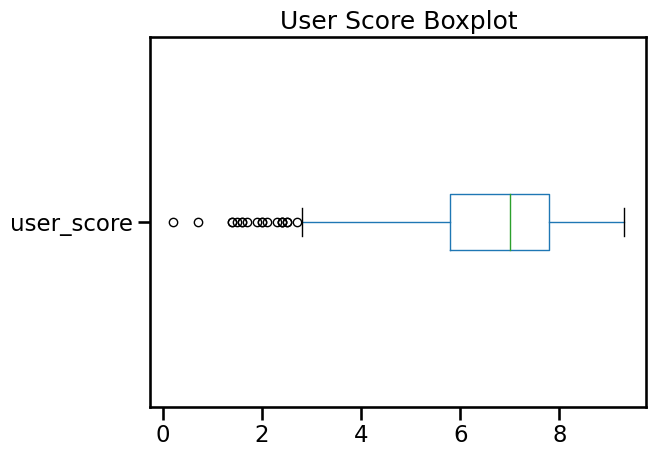

In [159]:
gdfa.user_score.plot.box(vert=False).set(title='User Score Boxplot');

Рейтинг обладает очень большим размахом, имеет смысл задать высокую статическую значимость. Зададим 7%.

In [160]:
stat_significance = .07

### 5.1. <a id='toc5_1_'></a>[Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#toc0_)

Для проверки этой гипотезы возьмём нулевой что они одинаковы, альтернативной что нет, здесь нас интересует двусторонняя проверка так как мы проверяем именно равенство.

In [161]:
gdfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1692 entries, 31 to 16605
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1692 non-null   object 
 1   platform         1692 non-null   object 
 2   year_of_release  1692 non-null   Int32  
 3   genre            1692 non-null   object 
 4   na_sales         1692 non-null   Float32
 5   eu_sales         1692 non-null   Float32
 6   jp_sales         1692 non-null   Float32
 7   other_sales      1692 non-null   Float32
 8   critic_score     991 non-null    Int32  
 9   user_score       890 non-null    float64
 10  rating           1692 non-null   object 
 11  sales            1692 non-null   Float32
dtypes: Float32(5), Int32(2), float64(1), object(4)
memory usage: 201.7+ KB


In [162]:
results = st.ttest_ind(
    gdfa.query('platform == "XOne"').user_score.dropna().astype('float32'), # bugs with Float32
    gdfa.query('platform == "PC"').user_score.dropna().astype('float32')
)

print('p-значение:', results.pvalue)

if results.pvalue < stat_significance:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450648637161196
Не получилось отвергнуть нулевую гипотезу


**Вывод** 

Стат анализ говорит о том, что гипотезу следует отвергнуть на имеющихся данных, на уровне значимости 7%. Рейтинги скорее всего значительно отличаются.

### 5.2. <a id='toc5_2_'></a>[Средние пользовательские рейтинги жанров `Action` и `Sports` разные.](#toc0_)

В виду особенностей Т-тестов, здесь уместно проверять от обратного. Для проверки этой гипотезы возьмём нулевой что они одинаковы, альтернативной что нет, здесь нас интересует двусторонняя проверка, так как мы проверяем неравенство. В случае если мы отбрасываем Нулевую гипотезу, можно говорить о том, что оригинальную гипотезу из ТЗ не следует отвергать.

In [163]:
results = st.ttest_ind(
    gdfa.query('genre == "Action"').user_score.dropna().astype('float32'), # bugs with Float32
    gdfa.query('genre == "Sports"').user_score.dropna().astype('float32')
)

print('p-значение:', results.pvalue)

if results.pvalue < stat_significance:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.871148452488903e-19
Отвергаем нулевую гипотезу


**Вывод** 



Оригинальную гипотезу не следует отвергать на имеющихся данных, на уровне значимости 7%,  т.к. стат анализ рекомендует отвергнуть нулевую гипотезу противоположную ей. Средние пользовательские рейтинги жанров `Action` и `Sports` скорее всего значительно отличаются.  

## 6. <a id='toc6_'></a>[Общий вывод](#toc0_)

Задачей проекта было проанализировать данные об играх с целью помочь менеджерам магазина «Стримчик» составить план по продвижению и продаже игр на 2017 год. 

Данные собраны из открытых источников, однако имеют достаточно большое количество пропусков. Часть из них обусловлены тем, что данные включают информацию об очень старых играх и консолях или о недавно вышедших играх, о которых еще не сформировалась в открытом доступе необходимая информация. Тем не менее, большое количество пропусков и аномалий похожи на сбои при непосредственно сборе информации, возможно технические, возможно человеческие, имеет смысл произвести наладку процесса для дальнейших сборов данных.

Для начала полноценного исследовательского анализа, требовалось выделить промежуток времени, актуальный для составления плана на 2017. В качестве такого периода взяли 2014-2016 годы, для того чтобы сохранить достаточное количество записей актуальных данных на основе которых можно делать выводы, с учётом неполноты данных на 2016 год. 

На 2016 год консолями последнего поколения являются, PS4, PSV, XBox One, Nintendo 3DS, WiiU, из них первые две стационарные, остальные - переносные. ПК занимает довольно маленькую долю (3.71%) продаж и играет несколько меньшую роль чем за весь период представленный в данных. Стоит учитывать что разные платформы следуют разным ценовым моделям, и что данные могут не отражать полную картину продаж, но в целом имеет смысл сконцентрировать усилия на XBOX и PS4 - стационарные консоли с крупной аудиторией, причём из них PS4 сильно преуспевает (39.4%) над своим главным оппонентом XOne (19.23%), даже в домашнем для последней Американском регионе(PS4 – 34.70%, Xone – 28.60%). Однако, не стоит полностью отказываться и от других платформ, т.к. они способны так же способны приносить прибыль не смотря на то, что менее привлекательны. Следуют учесть что в Японии, в отличии от других регионов, особой популярностью пользуются Nintendo 3DS (47.49%) и другие портативные консоли, и практически отсутствуют продажи PC и XBOX (<1%, суммарно). Таким образом PS4 является главным лидером, в добавок лидируя по количеству хитов, а игры остальных платформы следует продвигать учитывая региональную специфику.

Отзывы критиков таже оказывают значительное внимание на продажи, если есть возможность проконсультироваться или получить оценки экспертов до выпуска игры это может помочь решить к каким проектам следует продвигать внимание текущих пользователей. Также это может помочь привлечь новых пользователей за счёт рекламы продажи популярных игр магазином.

Говоря о жанрах следует выделить четыре направления. Главное из них это `Action`(27.31%), они популярны во всём мире и пользуются хорошим спросом. На втором месте `Shooter`(23.42%), не смотря на низкий спрос в Японии в целом занимает уверенное второе место. `Role-Playing` (13.93%) и `Sports` (15.00%) делят между собой третье место. Особенности данных жанров в разнице в предпочтениях пользователей разных регионов. В частности `Sports` значительно обгоняют `RP` в `NA`(16.23%) и `EU`(16.88%) регионах, но играют маленькую роль в `JP`. Ролевые игры наоборот, занимая четвертое место в `NA` и `EU`, занимают первое в `JP`(35.51%). Стоит учесть что данный жанр включает `JRPG` - японские ролевые игры, которые имеют свои особенности и наиболее популярны в Японии. Таким образом говоря о жанрах для продвижения следует учитывать региональную специфику, предоставляя пользователям информацию и рекламные предложения, которые могут с наибольшим шансом быть популярны в их регионе. Хитами могут похвастаться в основном жанры - лидеры, однако примечательны несколько хитов `Fighting`, что говорит о возможном наличие дополнительного спроса на жанр, но только к играм отвечающим критериям пользователей.

Какую  играет роль рейтинг ESRB  играет сам по себе сложно, но есть ряд примечательных закономерностей. В Японии он намного менее влиятелен - игры выпускаемые и продаваемые там зачастую его вовсе не получают (ESRB - Северо-Американыская организация, влияение которой на европу обусловлено близкими культурными связями). Главное что стоит выделить - игры с рейтингом M в среднем продают в полтора раза больше копий, кроме Японии где они отстают, T - достаточно мало популярная категория - ей в основом не покупают детям и она менее привлекательно взрослым. Однако стоит учитывать что рейтинг описывает рекомендуемый минимальный возраст, но не обязательно целевую аудиторию.

Оценка гипотез показала, что, как оценки пользователей `PC` и `XOne`, так и оценки `Sport` и `Action`, значительно отличаются.

Подводя итоги следует сказать что при принятие решений о проведении акций и рекламе, следует учитывать региональные особенности, однако имеет смысл сделать акцент на `PS4`, который занимает близкие высокии позиции на всех рынках. `Action` и `Role-Playing` обладают достаточно широким спросом и популярностью везде поэтому на них следует обращать отдельное внимание. `Shooter и `Sports` имеет смысл продвигать на для клиентов из Европы и Северной Америки.